In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing the Home Values files (4 files)

home_values1k = Path("datasets/KentHomeValues.csv")
home_values2m = Path("datasets/MuskegonHomeValues.csv")
home_values3o = Path("datasets/OaklandHomeValues.csv")
home_values4s = Path("datasets/SaginawHomeValues.csv")

In [3]:
#creating the 4 different dataframes for Home Values

home_values1k_df = pd.read_csv(home_values1k)
home_values2m_df = pd.read_csv(home_values2m)
home_values3o_df = pd.read_csv(home_values3o)
home_values4s_df = pd.read_csv(home_values4s)


home_values1k_df.head()




2011-01     2011-02  2011-03     2011-04     2011-05     2011-06  \
0  123,130.00  122,660.00      NaN  121,850.00  121,400.00  120,740.00   

      2011-07     2011-08     2011-09     2011-10  ...     2022-08  \
0  120,110.00  119,930.00  120,050.00  120,120.00  ...  316,100.00   

      2022-09     2022-10     2022-11     2022-12     2023-01     2023-02  \
0  312,950.00  310,450.00  308,950.00  308,150.00  308,170.00  308,970.00   

      2023-03     2023-04     2023-05  
0  310,850.00  313,000.00  315,740.00  

[1 rows x 149 columns]

In [4]:
frames = [home_values1k_df, home_values2m_df, home_values3o_df, home_values4s_df]
results = pd.concat(frames)


#results = results.drop('Year1')



results.head()


2011-01     2011-02     2011-03     2011-04     2011-05     2011-06  \
0  123,130.00  122,660.00         NaN  121,850.00  121,400.00  120,740.00   
0   76,860.00   76,300.00   75,840.00   75,290.00   74,630.00   73,880.00   
0  140,760.00  140,260.00  139,550.00  139,220.00  138,940.00  138,930.00   
0   74,700.00   74,200.00   73,290.00   72,200.00   71,340.00   70,630.00   

      2011-07     2011-08     2011-09     2011-10  ...     2022-08  \
0  120,110.00  119,930.00  120,050.00  120,120.00  ...  316,100.00   
0   73,150.00   72,870.00   72,840.00   72,910.00  ...  214,620.00   
0  139,290.00  139,640.00  140,180.00  140,460.00  ...  344,430.00   
0   70,310.00   70,110.00   70,010.00   69,320.00  ...  144,240.00   

      2022-09     2022-10     2022-11     2022-12     2023-01     2023-02  \
0  312,950.00  310,450.00  308,950.00  308,150.00  308,170.00  308,970.00   
0  213,560.00  212,380.00  211,380.00  210,850.00  211,120.00  212,100.00   
0  341,340.00  338,890.00  337,450.00  336,460.00  335,610.00  335,450.00   
0  144,150.00  144,120.00  144,430.00  144,980.00  146,110.00  147,240.00   

      2023-03     2023-04     2023-05  
0  310,850.00  313,000.00  315,740.00  
0  213,720.00  215,790.00  218,230.00  
0  336,620.00  338,540.00  341,030.00  
0  148,640.00  149,360.00  150,260.00  

[4 rows x 149 columns]

In [5]:
row_2column = results
home_transpose = pd.DataFrame(row_2column)
home_transpose = home_transpose.transpose()

home_transpose.head()

home_transpose.columns = ['Kent County', 'Muskegon County', 'Oakland County', 'Saginaw County']

home_transpose.reset_index(inplace=True)

home_transpose[['Year', 'Month']] = home_transpose['index'].str.split('-', expand=True)

home_transpose.drop('index', axis=1, inplace=True)

home_transpose.head()

Kent County Muskegon County Oakland County Saginaw County  Year Month
0  123,130.00       76,860.00     140,760.00      74,700.00  2011    01
1  122,660.00       76,300.00     140,260.00      74,200.00  2011    02
2         NaN       75,840.00     139,550.00      73,290.00  2011    03
3  121,850.00       75,290.00     139,220.00      72,200.00  2011    04
4  121,400.00       74,630.00     138,940.00      71,340.00  2011    05

In [6]:

currency_columns = ['Kent County', 'Muskegon County', 'Oakland County', 'Saginaw County']
home_transpose[currency_columns] = home_transpose[currency_columns].replace('[\$,]', '', regex=True).astype(float)

avgresult = home_transpose.groupby(['Year', 'Kent County', 'Muskegon County', 'Oakland County', 'Saginaw County']).mean()

home_transpose.head()


Kent County  Muskegon County  Oakland County  Saginaw County  Year Month
0     123130.0          76860.0        140760.0         74700.0  2011    01
1     122660.0          76300.0        140260.0         74200.0  2011    02
2          NaN          75840.0        139550.0         73290.0  2011    03
3     121850.0          75290.0        139220.0         72200.0  2011    04
4     121400.0          74630.0        138940.0         71340.0  2011    05

In [31]:
avgresult.columns


Index(['Kent County', 'Muskegon County', 'Oakland County', 'Saginaw County'], dtype='object')

In [36]:
row_index = avgresult.index
print(row_index)

Index(['2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011',
       '2011',
       ...
       '2022', '2022', '2022', '2022', '2022', '2023', '2023', '2023', '2023',
       '2023'],
      dtype='object', name='Year', length=148)


In [7]:
print (avgresult)

                                                               Month
Year Kent County Muskegon County Oakland County Saginaw County      
2011 119870.0    72120.0         141060.0       67340.0         12.0
     119930.0    72870.0         139640.0       70110.0          8.0
     119950.0    72640.0         140740.0       68210.0         11.0
     120050.0    72840.0         140180.0       70010.0          9.0
     120110.0    73150.0         139290.0       70310.0          7.0
...                                                              ...
2023 308170.0    211120.0        335610.0       146110.0         1.0
     308970.0    212100.0        335450.0       147240.0         2.0
     310850.0    213720.0        336620.0       148640.0         3.0
     313000.0    215790.0        338540.0       149360.0         4.0
     315740.0    218230.0        341030.0       150260.0         5.0

[148 rows x 1 columns]


In [8]:
avgresult.columns

Index(['Month'], dtype='object')

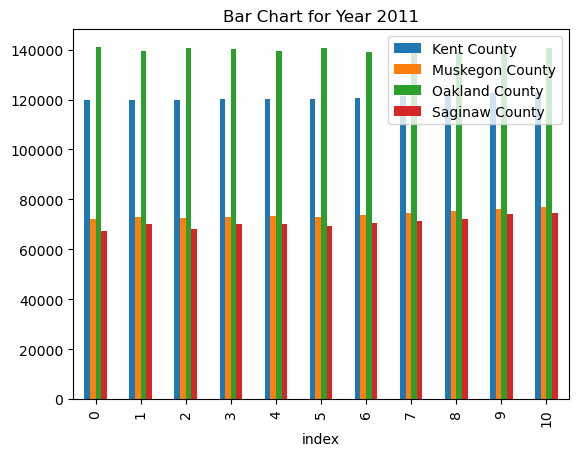

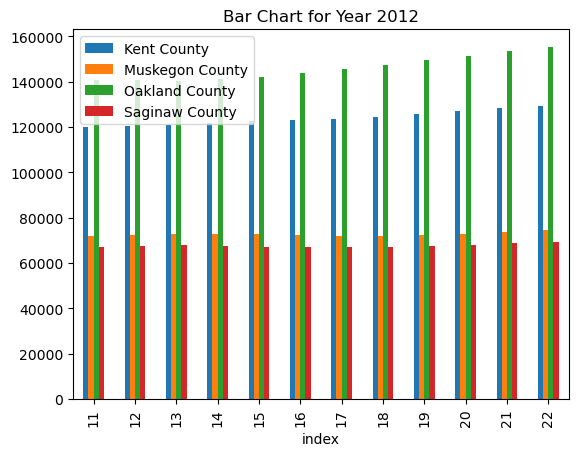

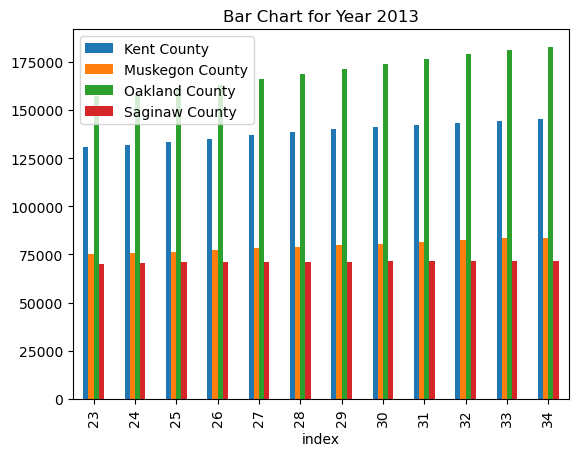

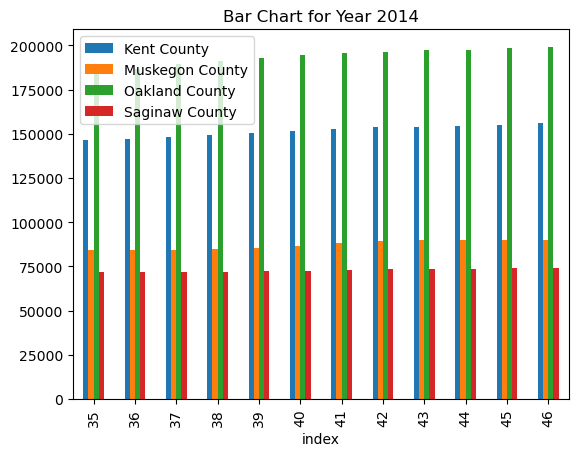

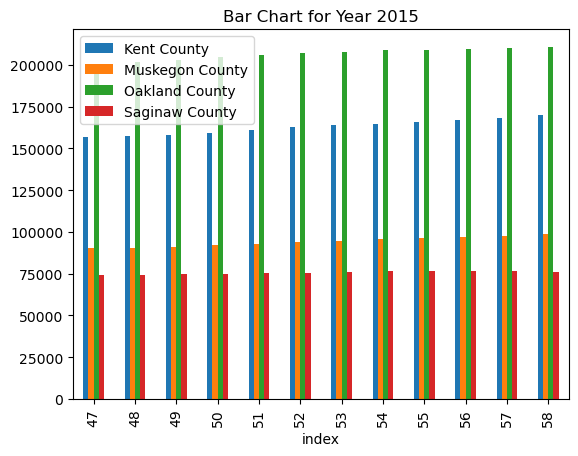

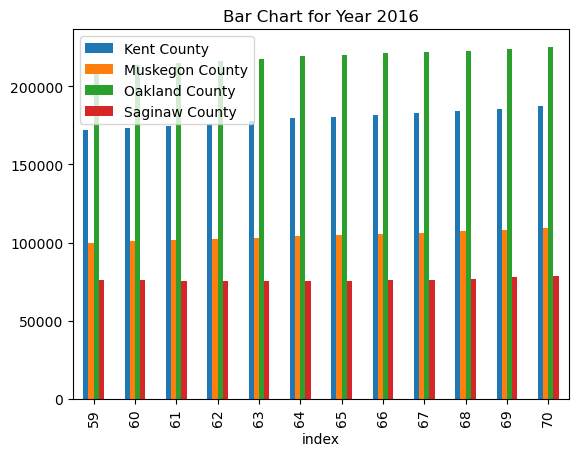

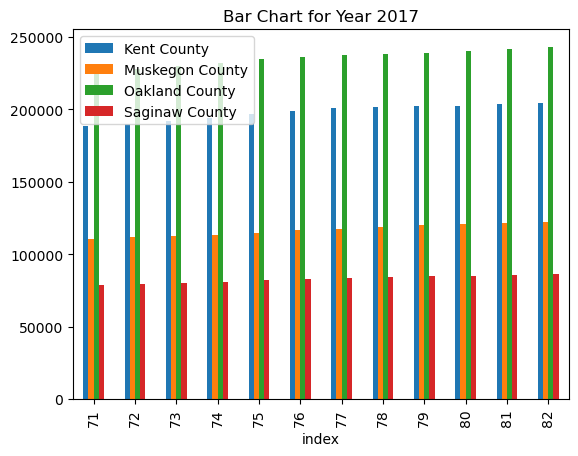

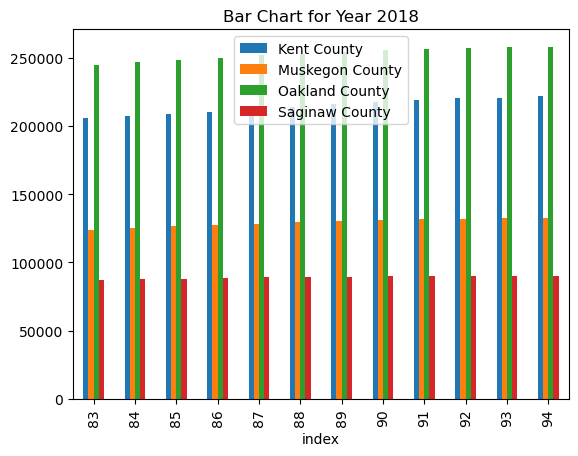

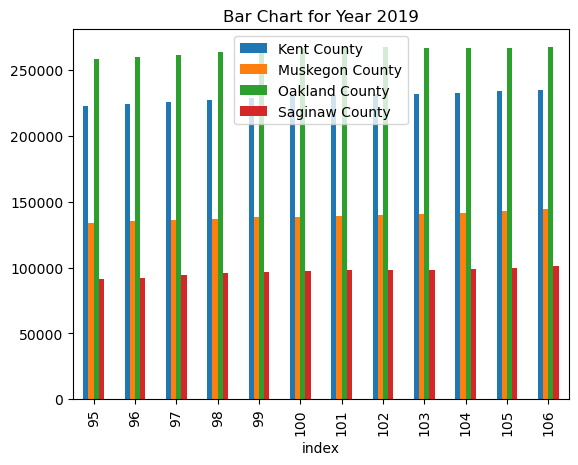

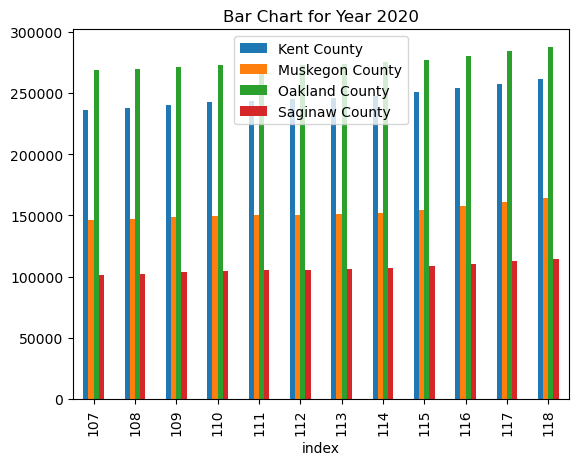

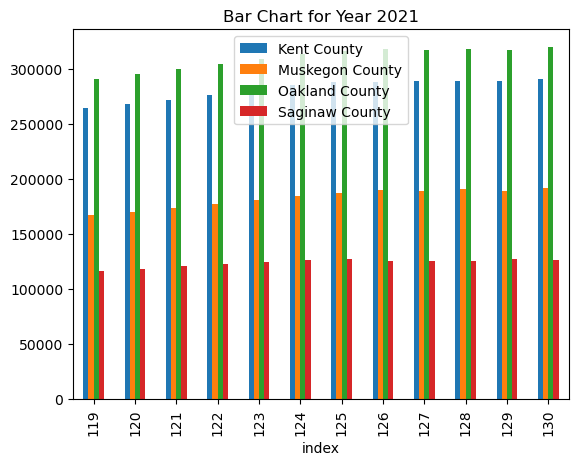

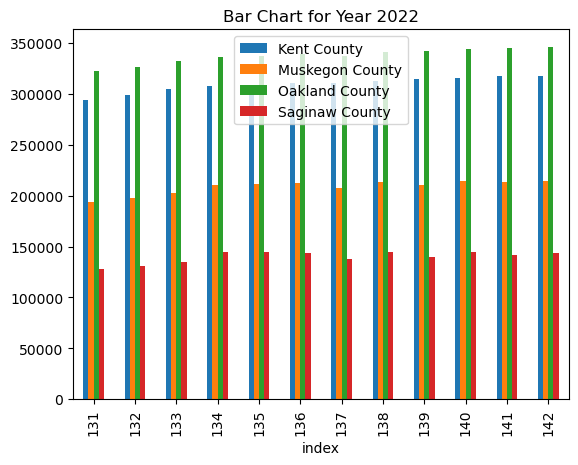

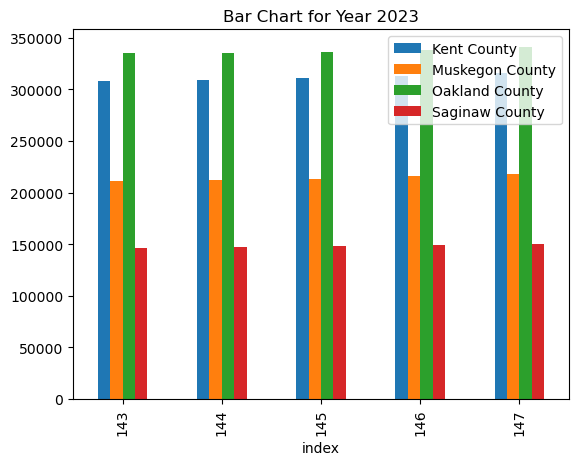

In [10]:
avgresult.reset_index(inplace=True)

columns_to_plot = ['Kent County', 'Muskegon County', 'Oakland County', 'Saginaw County']

for year, group in avgresult.groupby('Year'):
    group.plot(kind='bar', x='index', y=columns_to_plot, title=f'Bar Chart for Year {year}', legend=True)
    plt.show()




In [11]:
avgresult.columns

Index(['index', 'Year', 'Kent County', 'Muskegon County', 'Oakland County',
       'Saginaw County', 'Month'],
      dtype='object')

In [35]:
row_index = avgresult.index
print(row_index)

Index(['2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011', '2011',
       '2011',
       ...
       '2022', '2022', '2022', '2022', '2022', '2023', '2023', '2023', '2023',
       '2023'],
      dtype='object', name='Year', length=148)


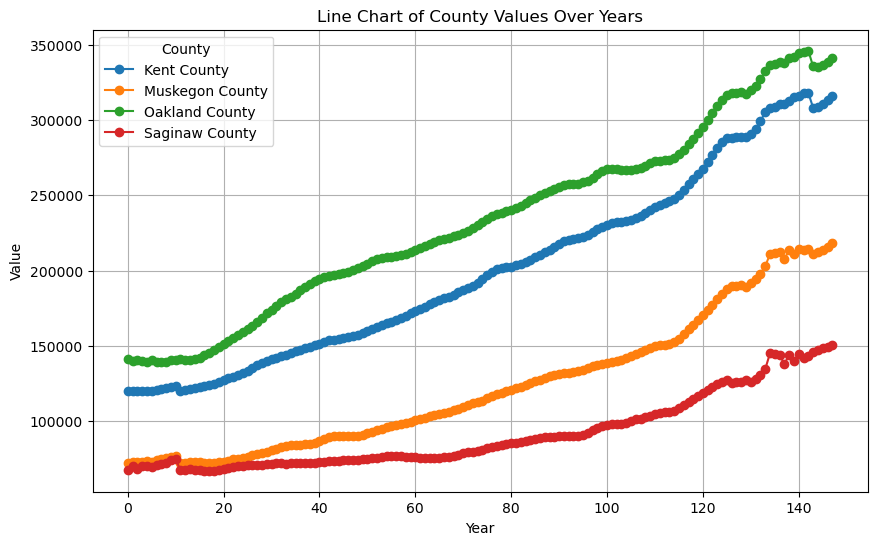

In [25]:



avgresult = avgresult.drop(columns=['index'])

avgresult.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Line Chart of County Values Over Years')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='County')
plt.grid(True)
plt.show()



In [57]:


#avgresult.set_index('Year', inplace=True)

percentage_growth_by_county = avgresult.pct_change() * 100
percentage_growth_by_county = percentage_growth_by_county.dropna()

unique_years = percentage_growth.index.unique()

print(percentage_growth_by_county)

      Kent County  Muskegon County  Oakland County  Saginaw County
Year                                                              
2011     0.050054         1.039933       -1.006664        4.113454
2011     0.016676        -0.315631        0.787740       -2.710027
2011     0.083368         0.275330       -0.397897        2.638909
2011     0.049979         0.425590       -0.634898        0.428510
2011     0.008326        -0.328093        0.839974       -1.408050
...           ...              ...             ...             ...
2023    -3.097289        -1.607867       -3.025312        1.861405
2023     0.259597         0.464191       -0.047674        0.773390
2023     0.608473         0.763791        0.348785        0.950829
2023     0.691652         0.968557        0.570376        0.484392
2023     0.875399         1.130729        0.735511        0.602571

[147 rows x 4 columns]


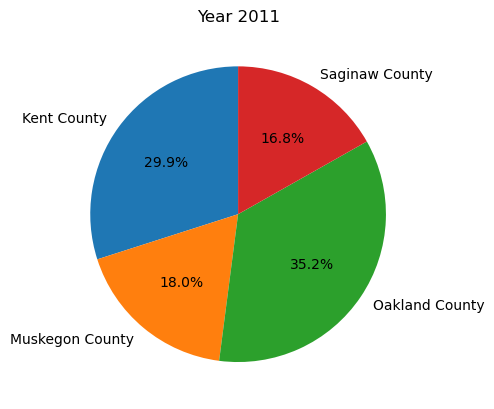

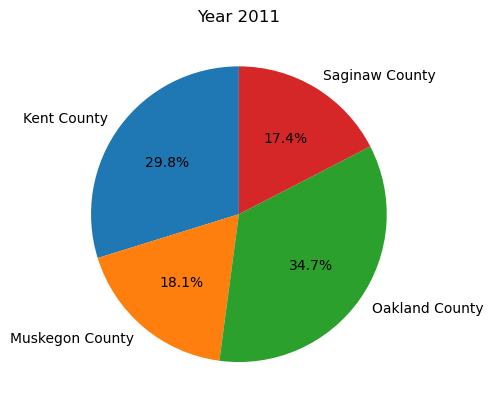

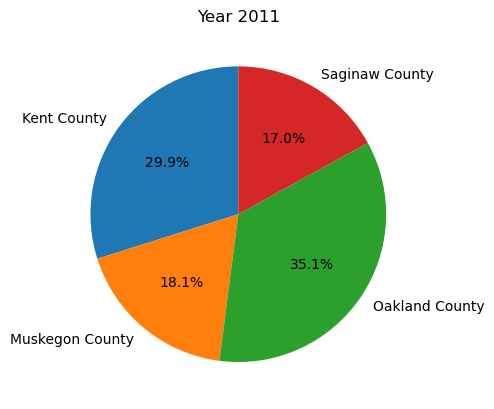

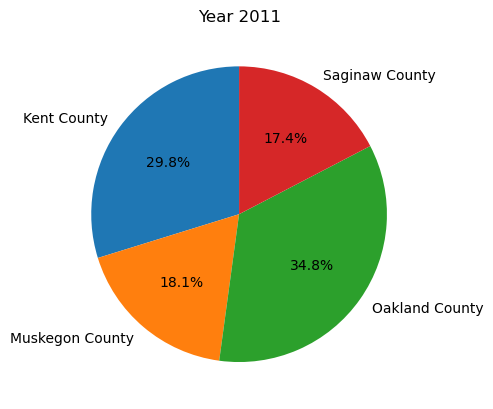

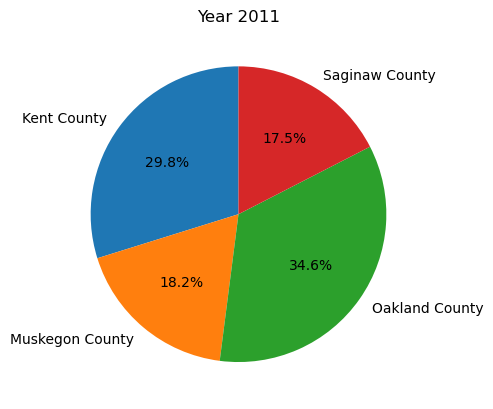

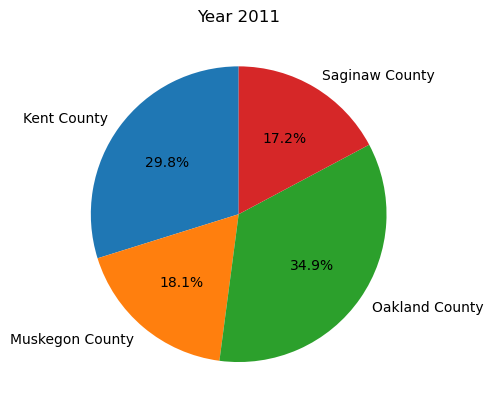

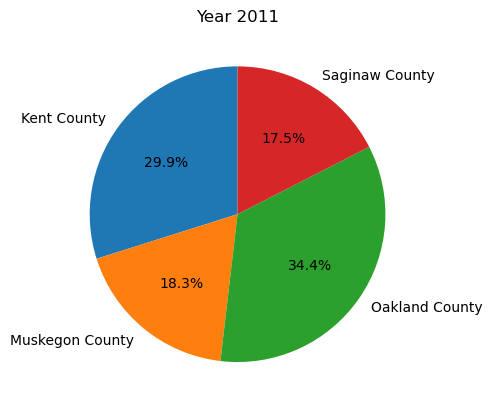

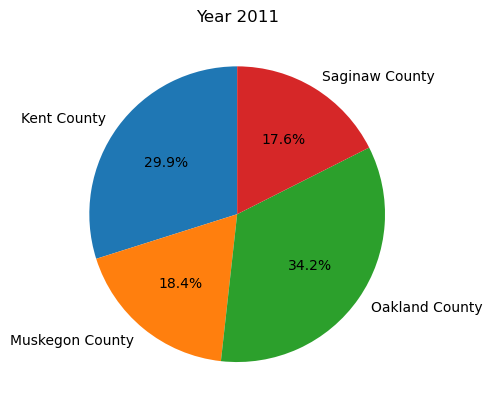

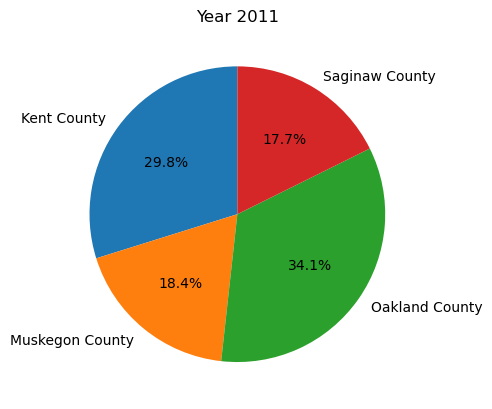

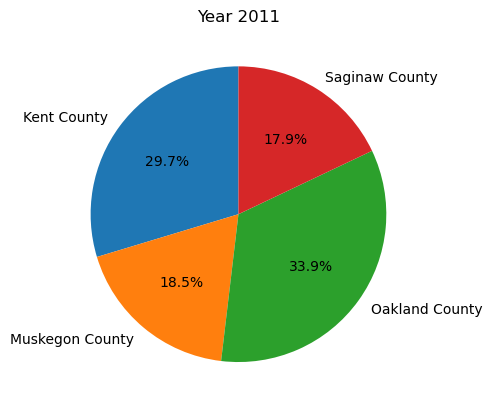

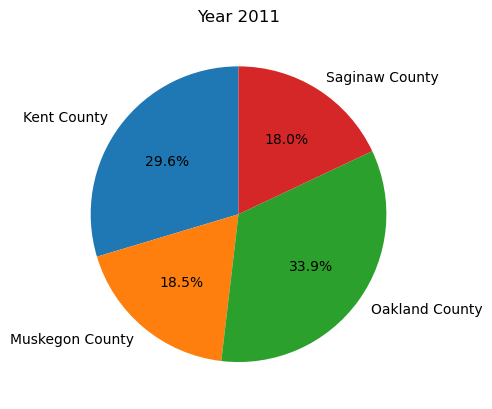

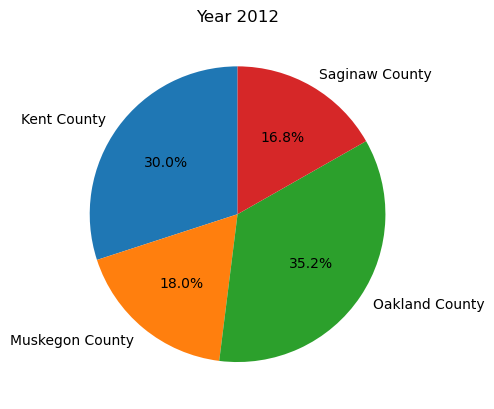

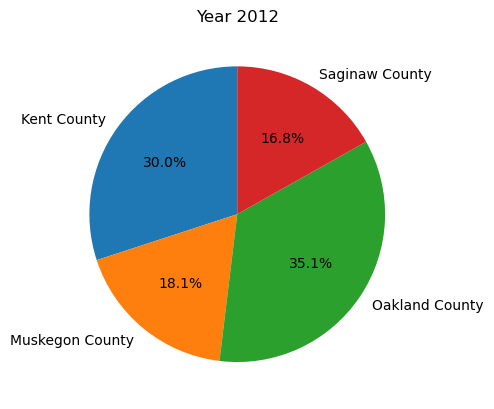

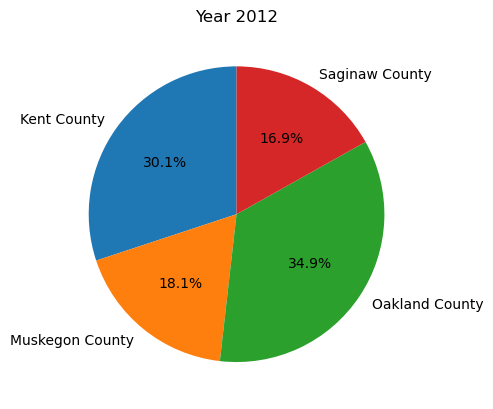

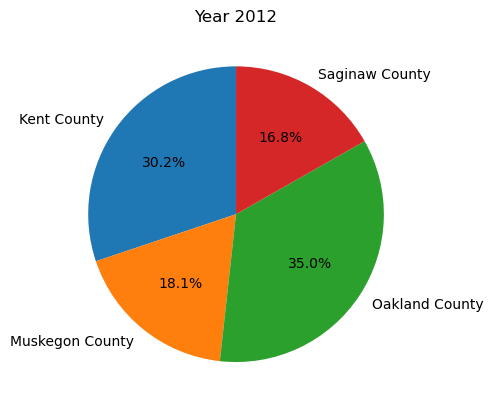

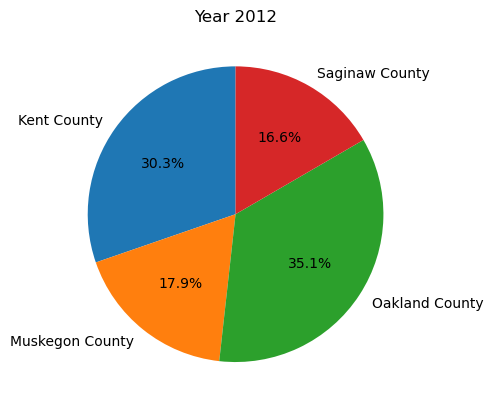

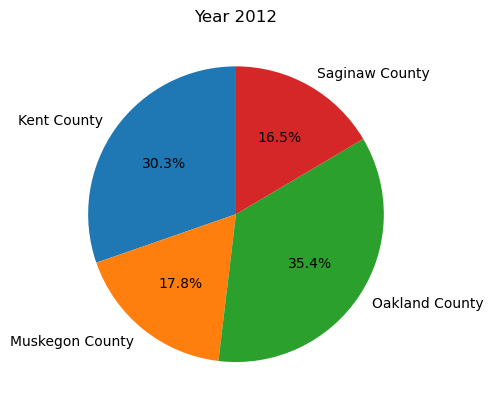

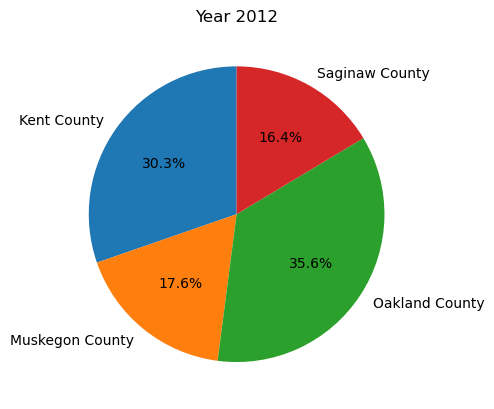

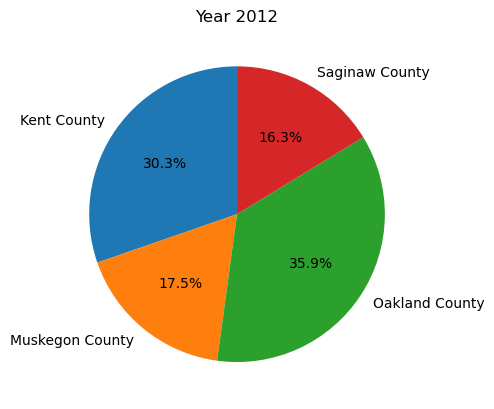

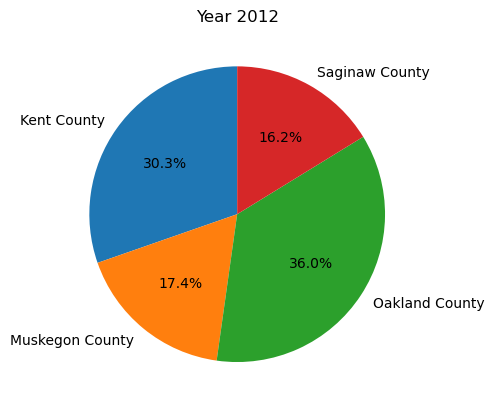

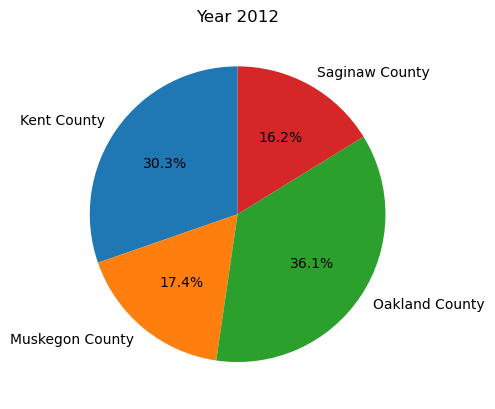

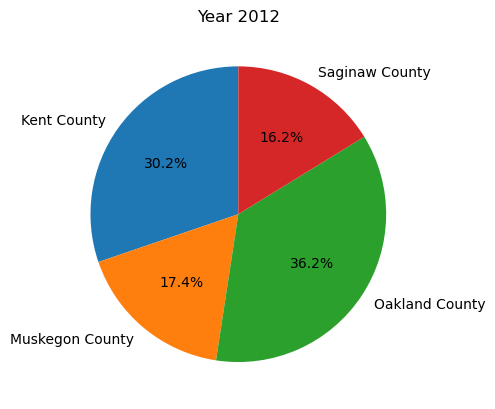

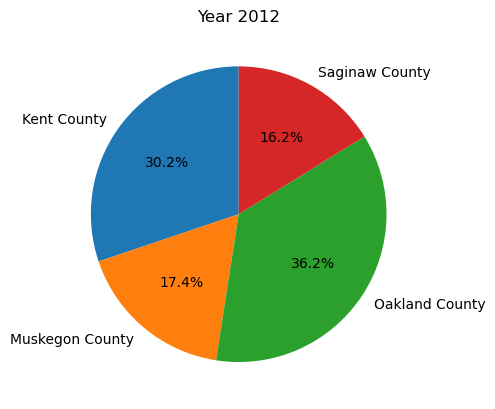

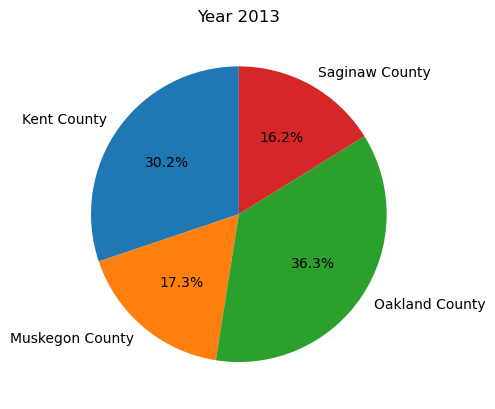

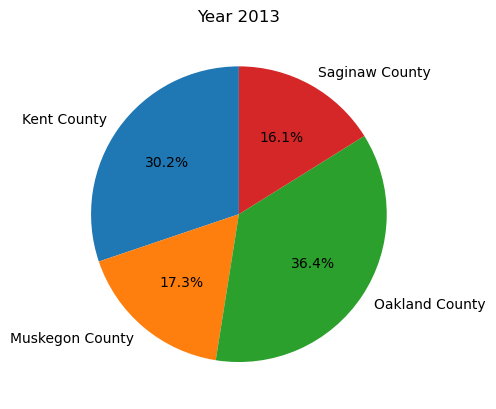

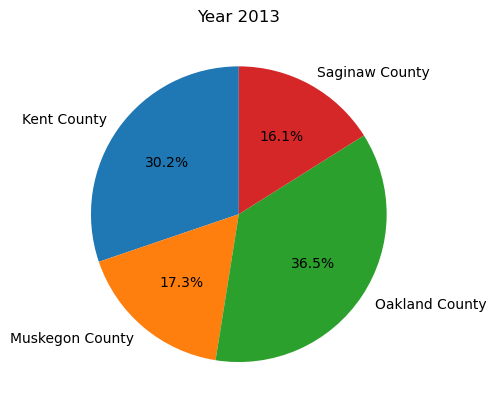

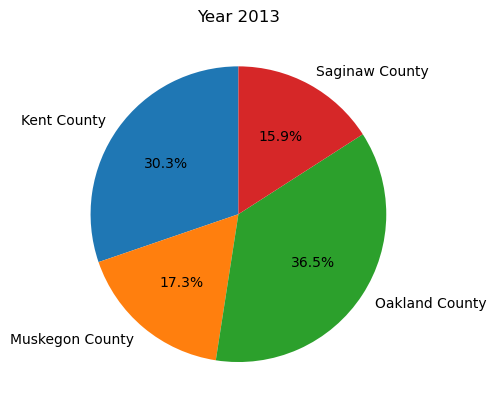

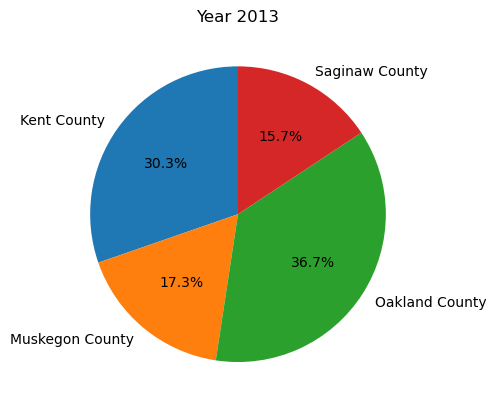

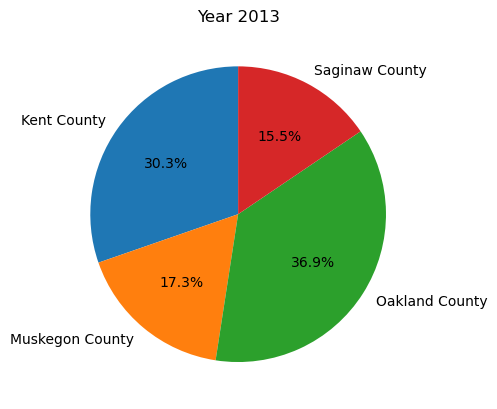

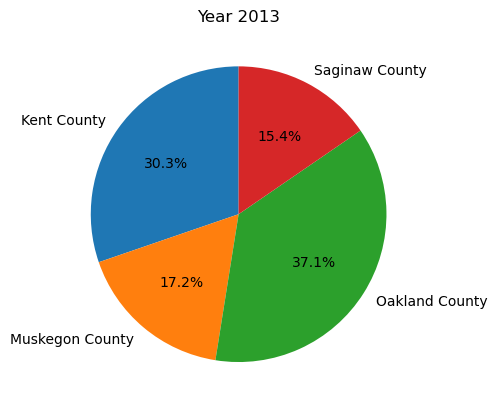

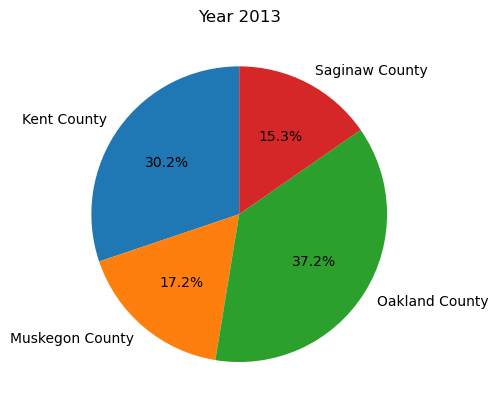

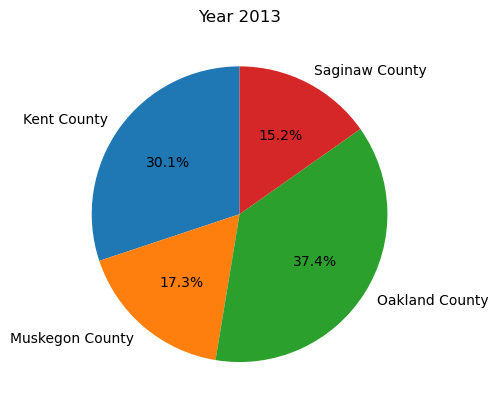

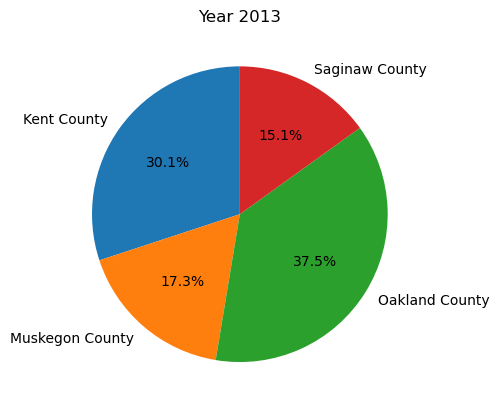

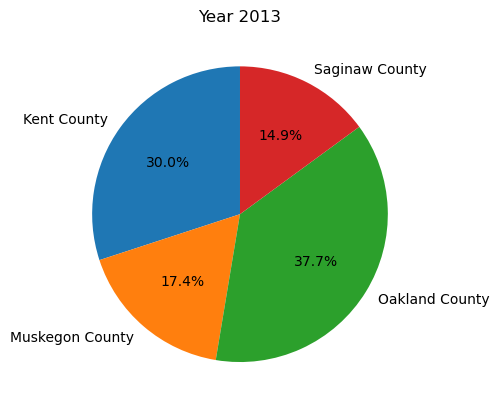

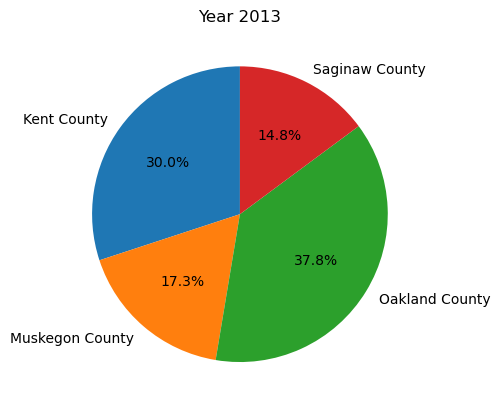

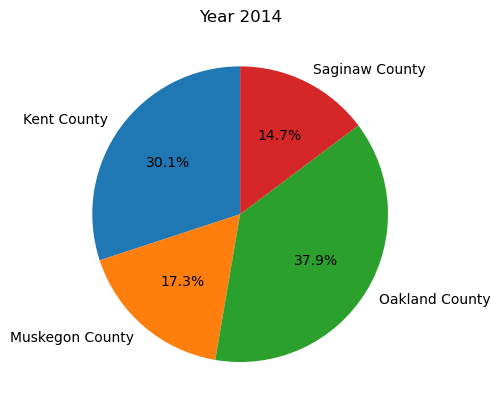

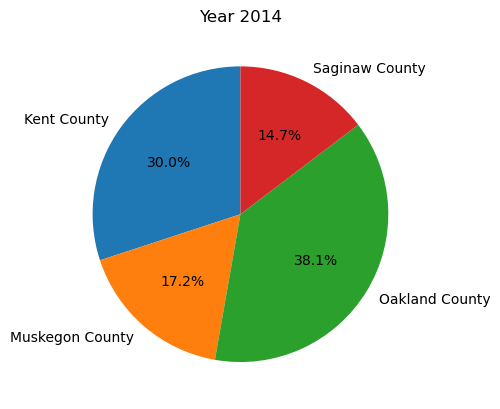

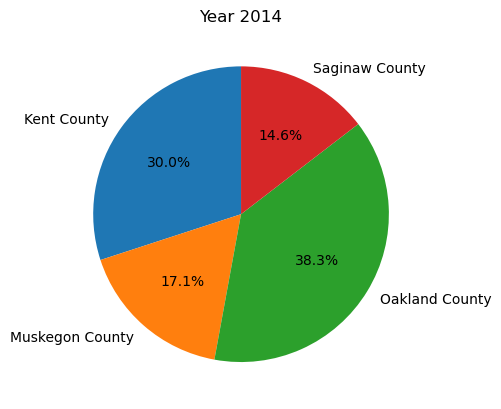

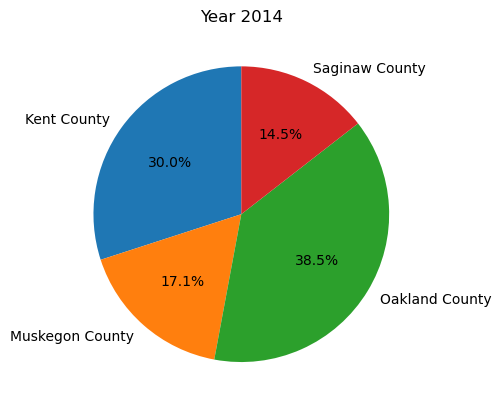

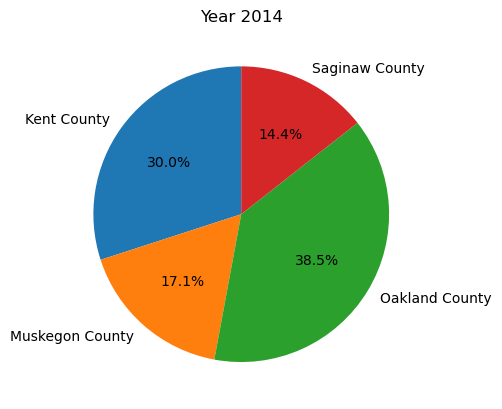

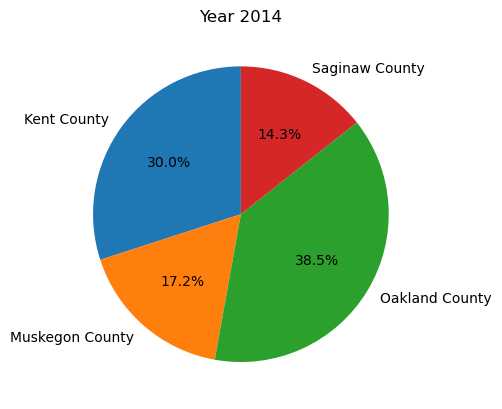

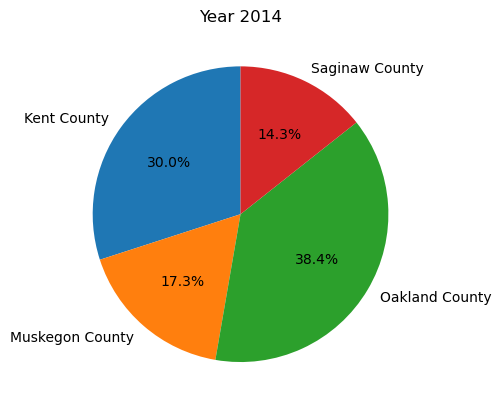

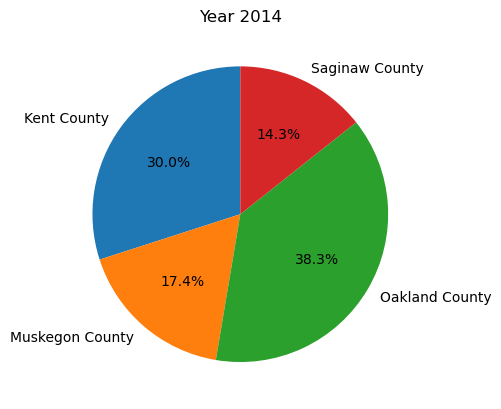

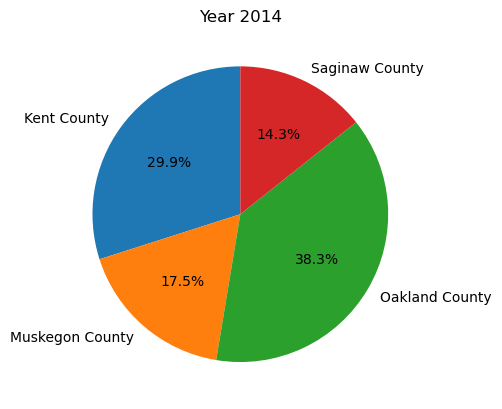

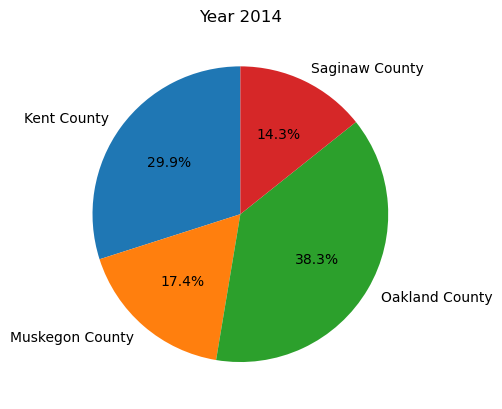

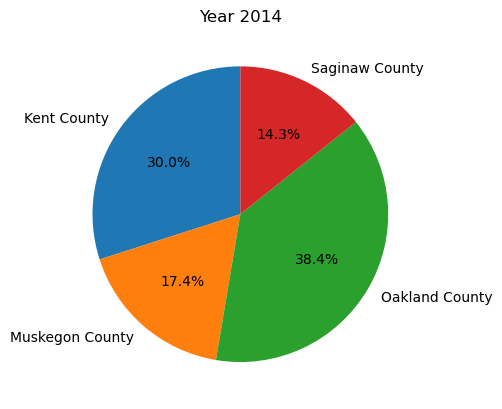

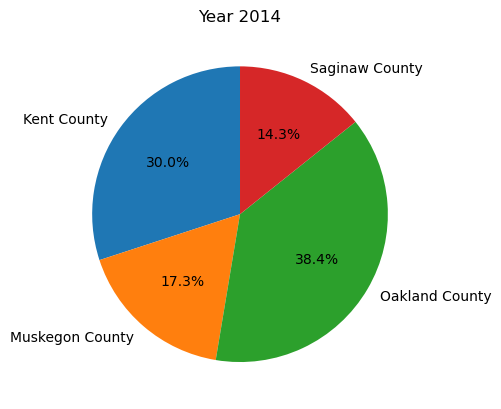

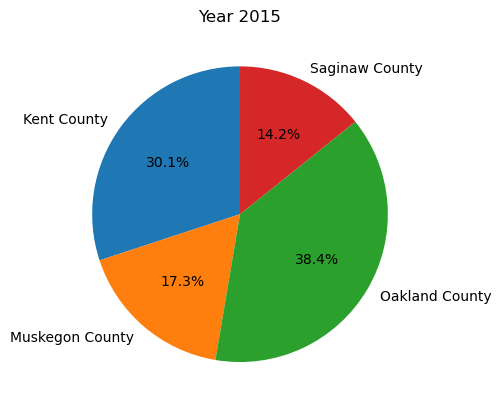

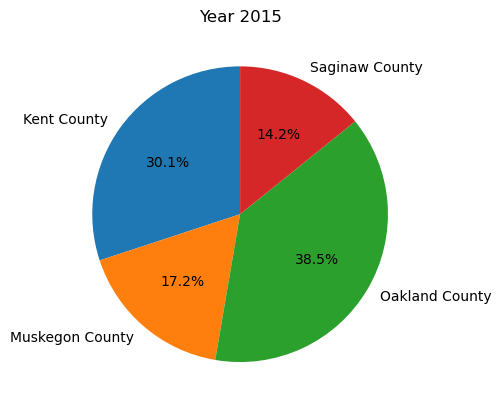

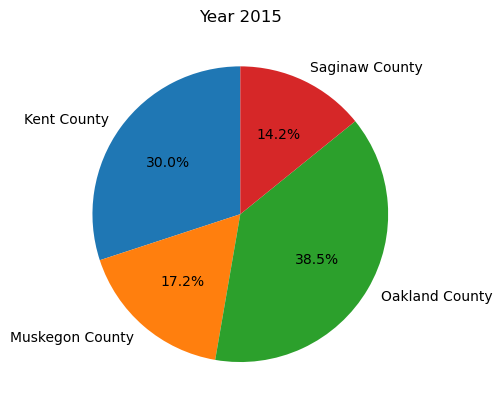

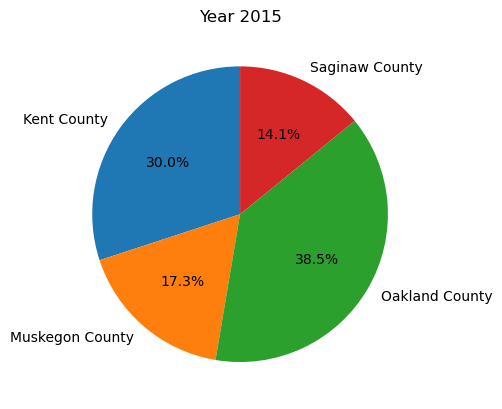

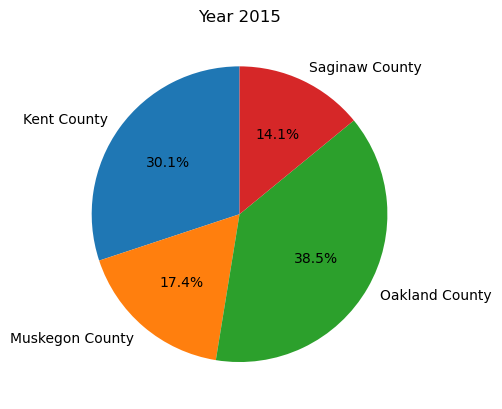

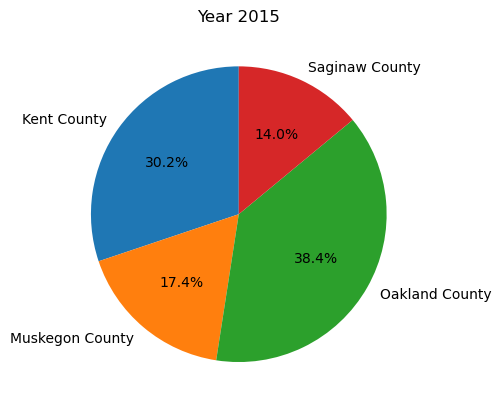

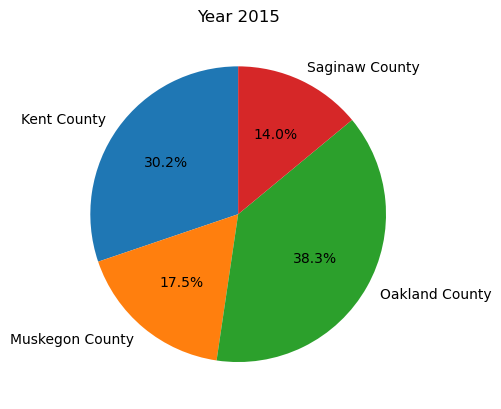

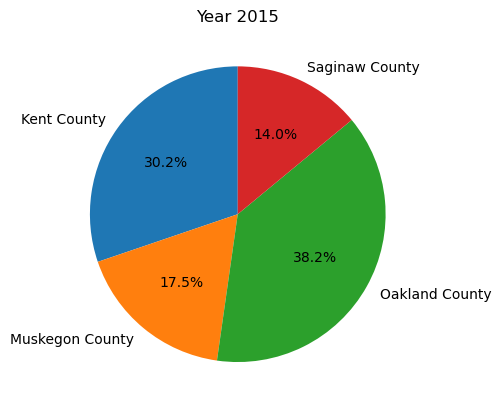

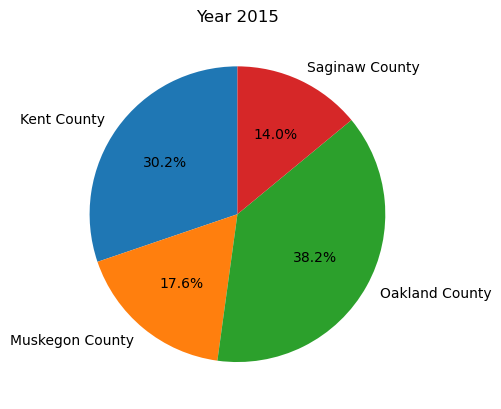

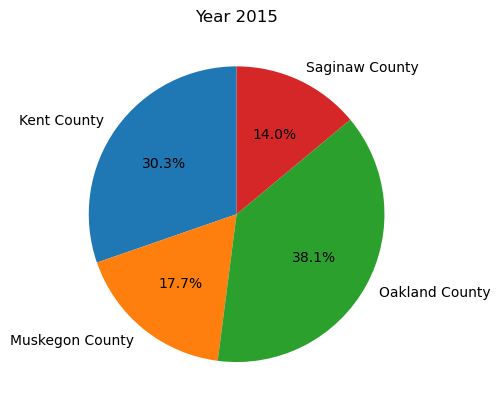

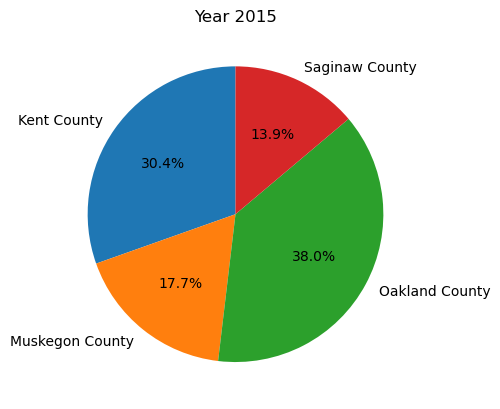

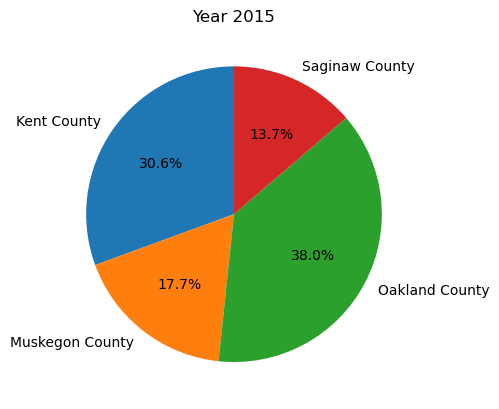

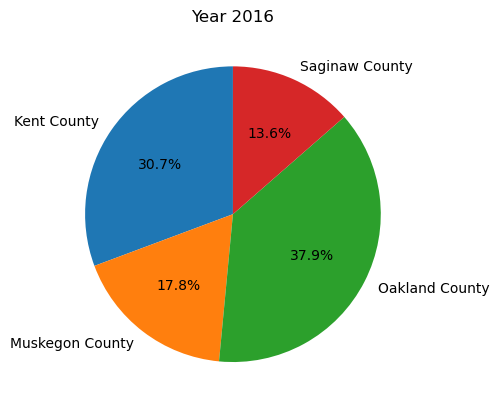

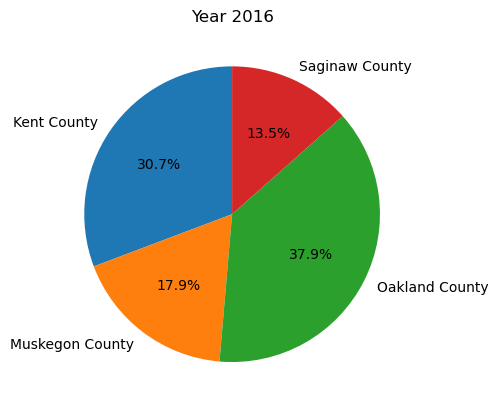

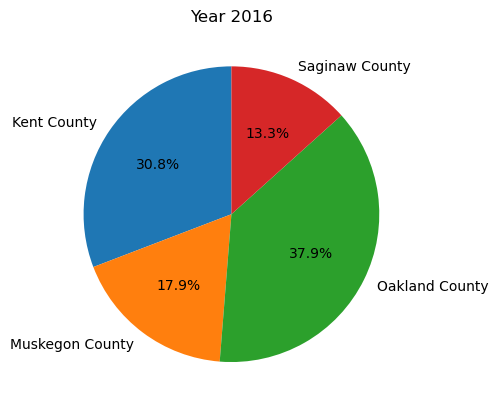

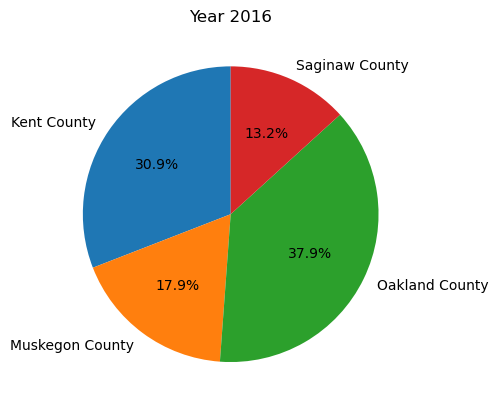

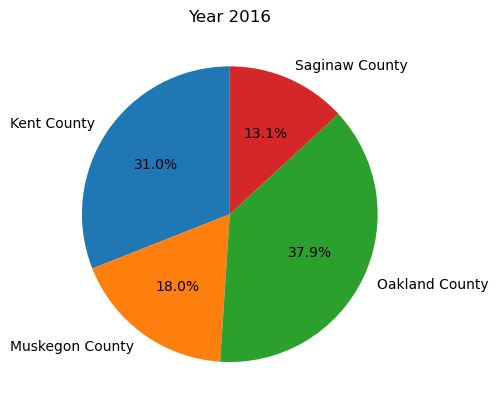

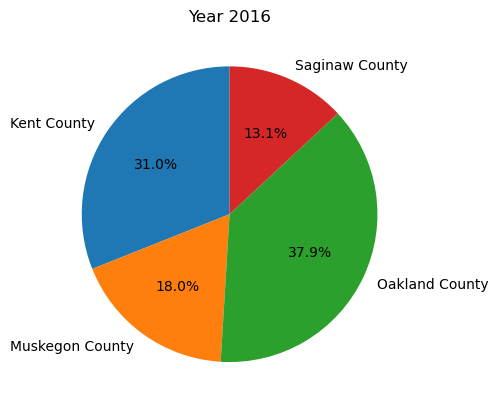

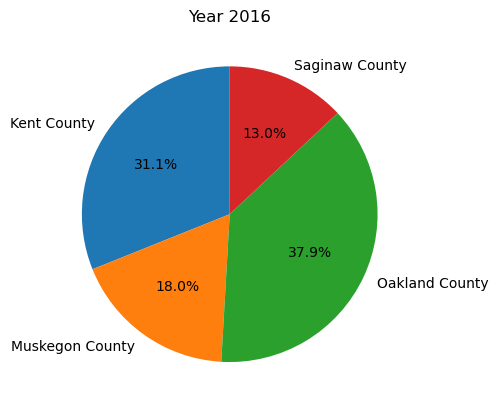

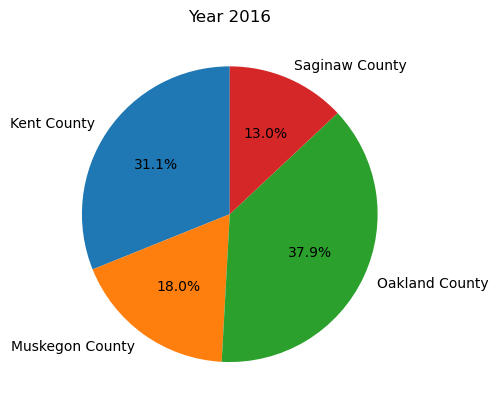

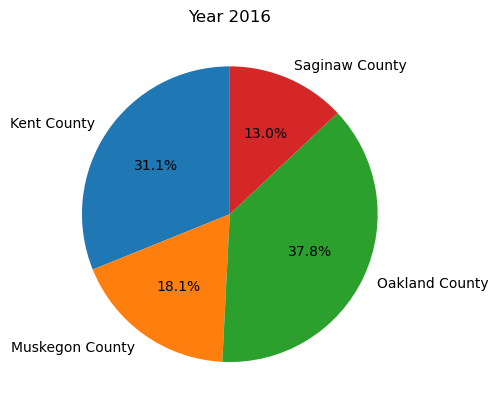

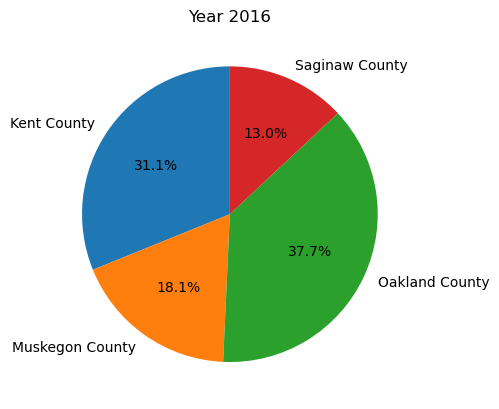

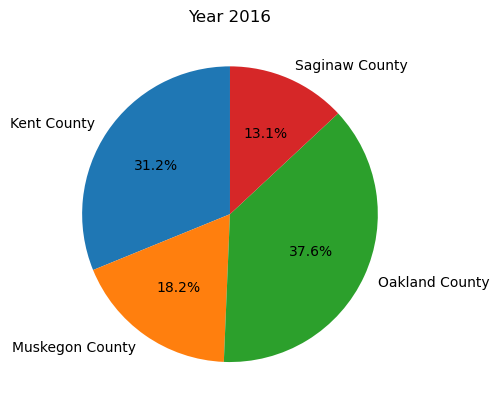

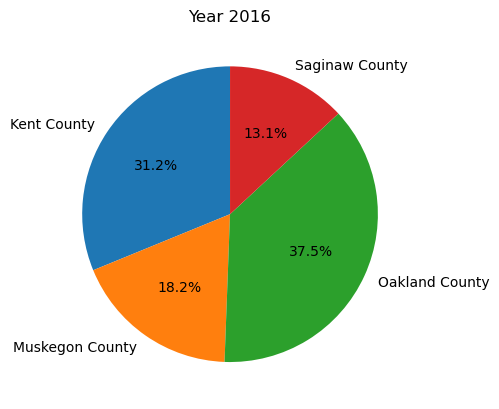

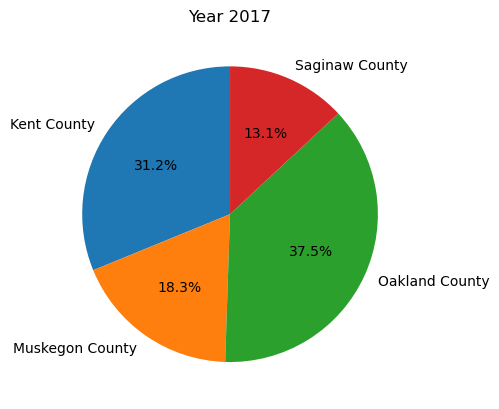

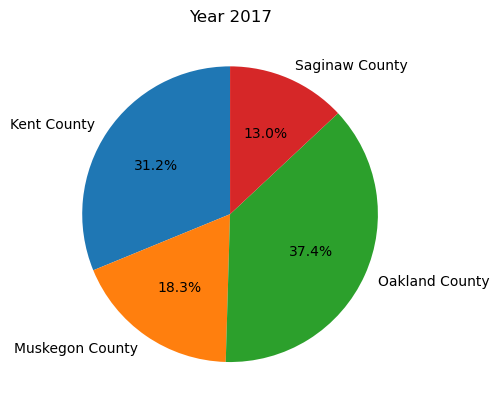

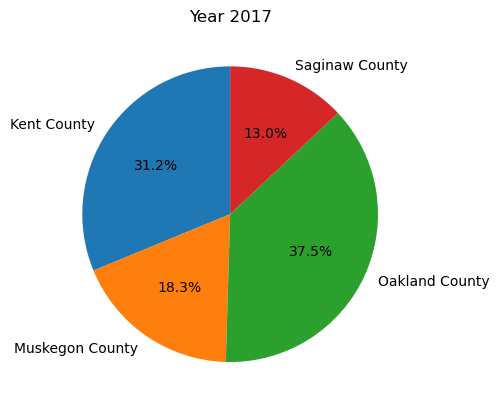

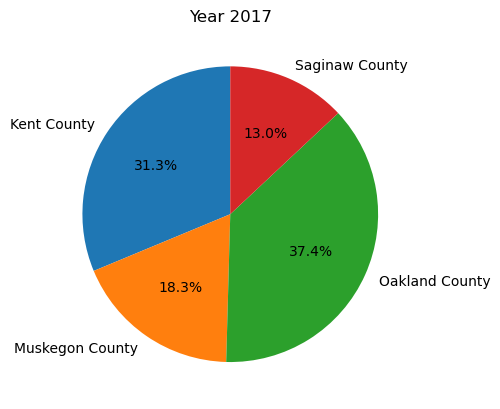

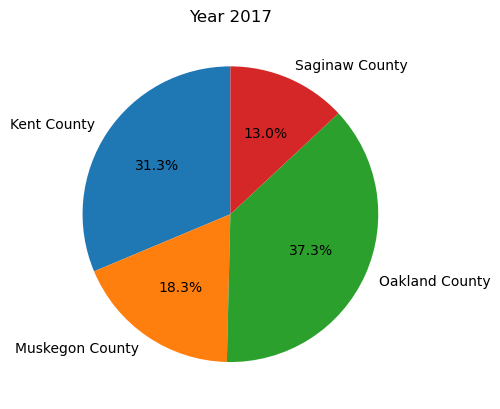

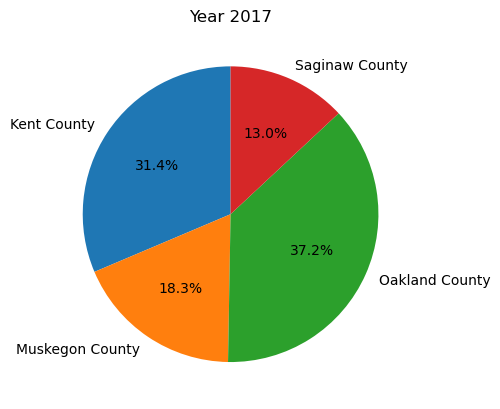

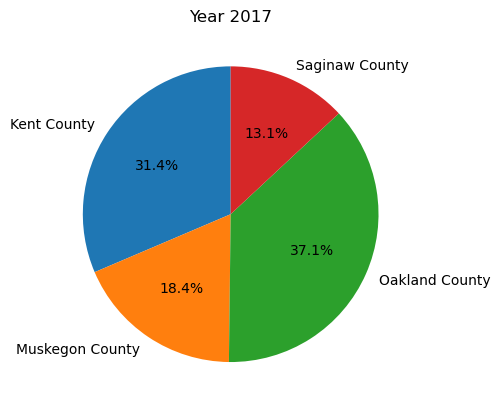

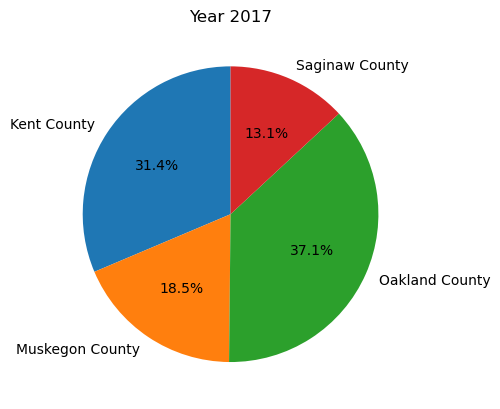

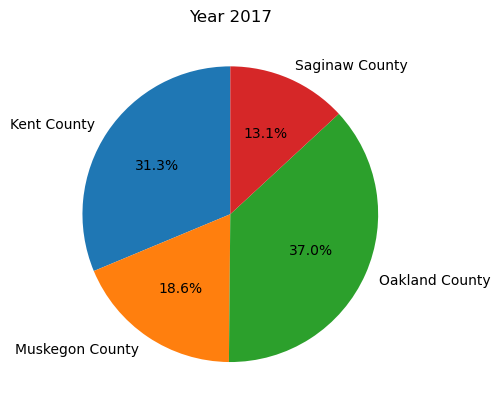

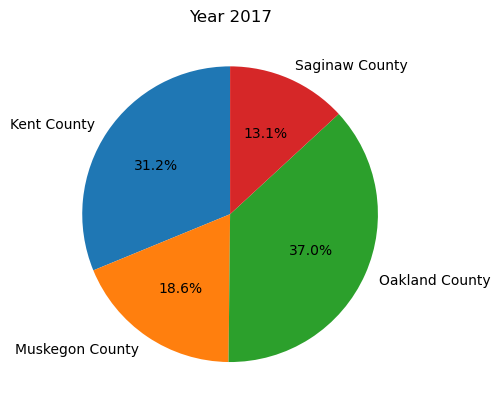

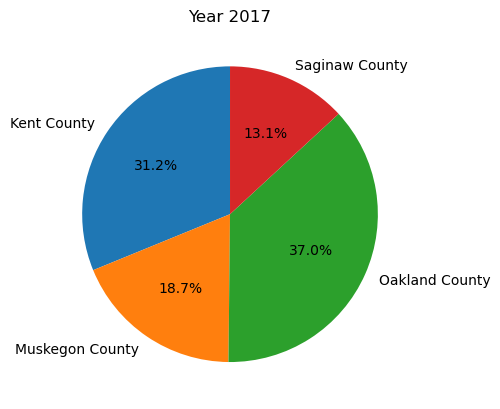

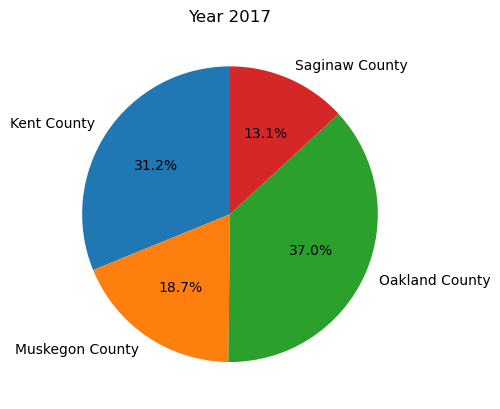

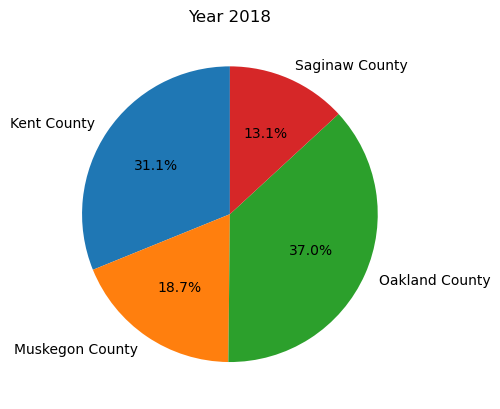

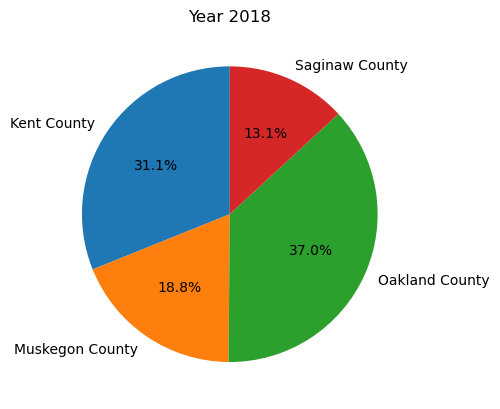

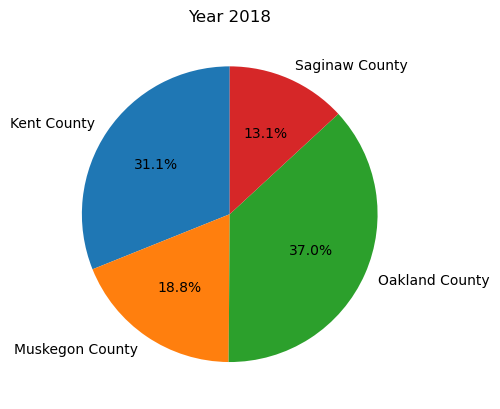

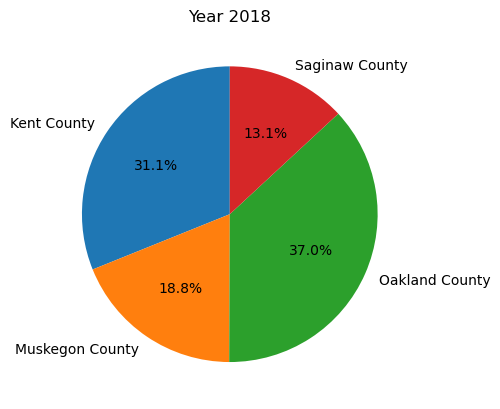

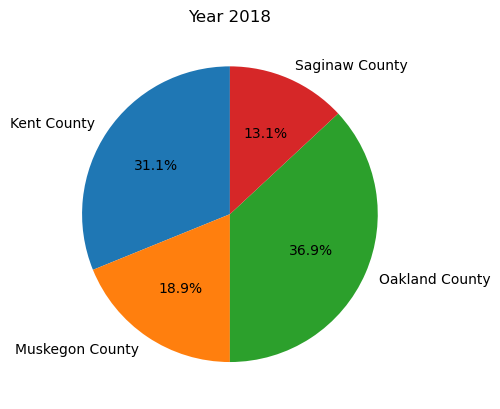

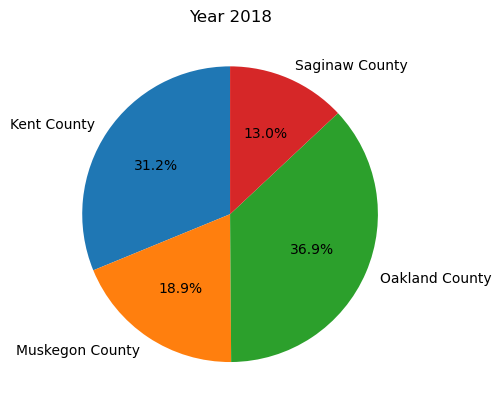

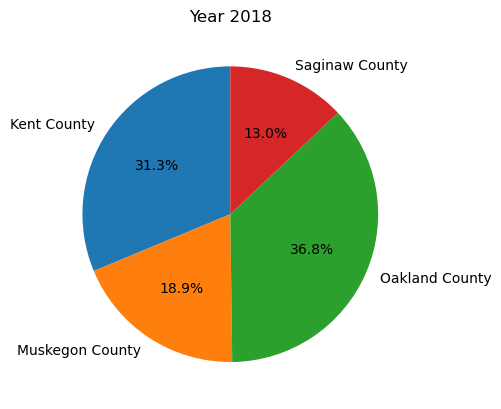

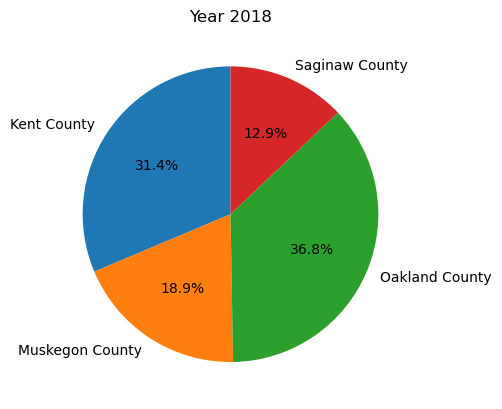

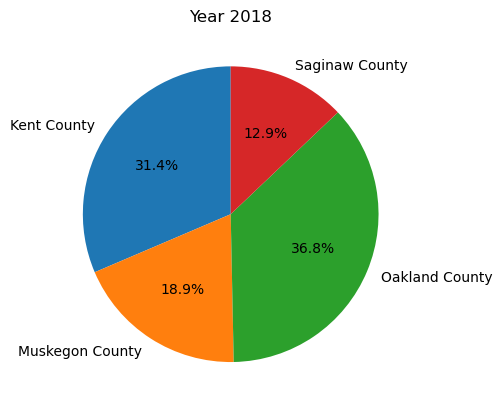

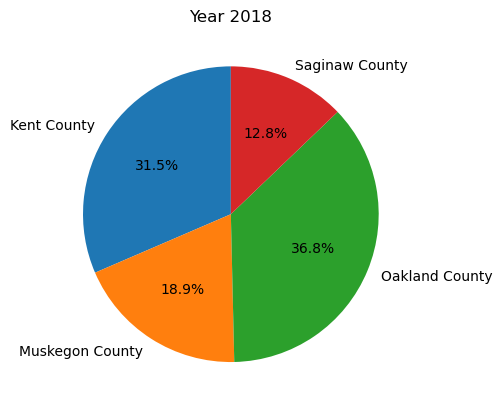

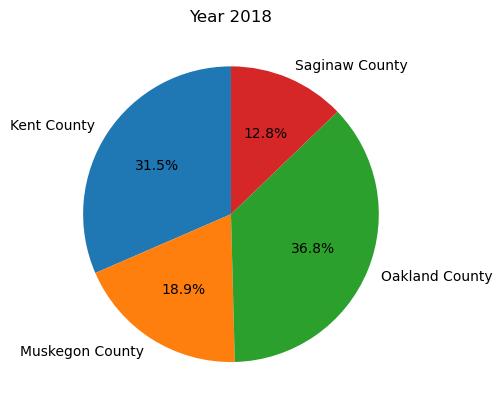

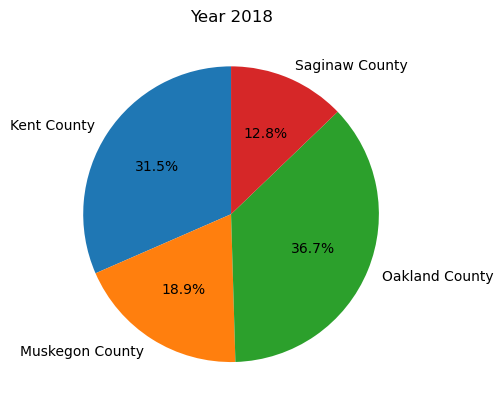

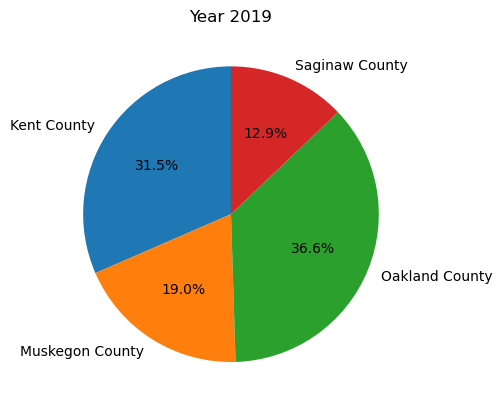

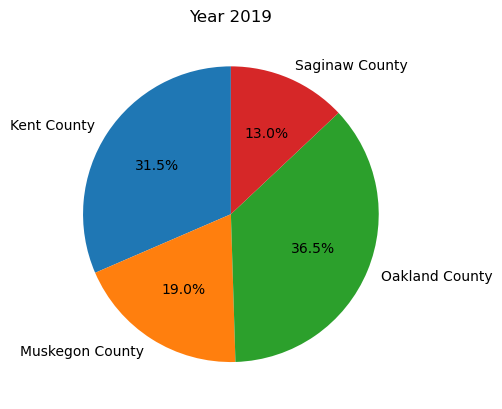

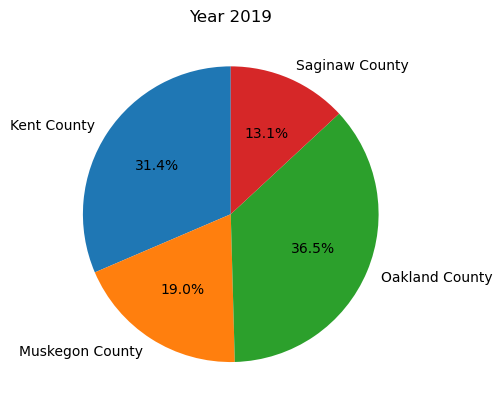

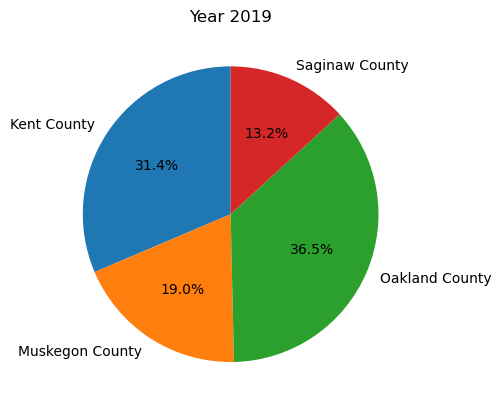

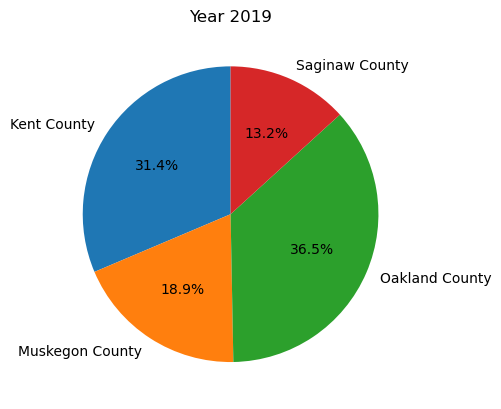

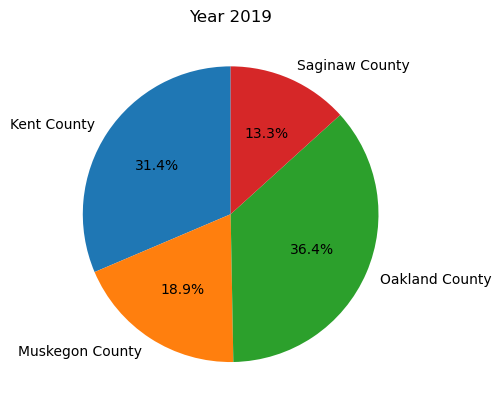

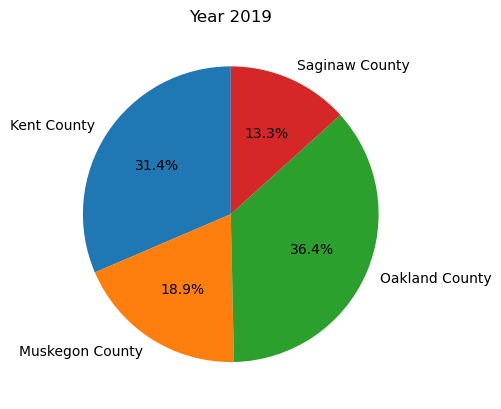

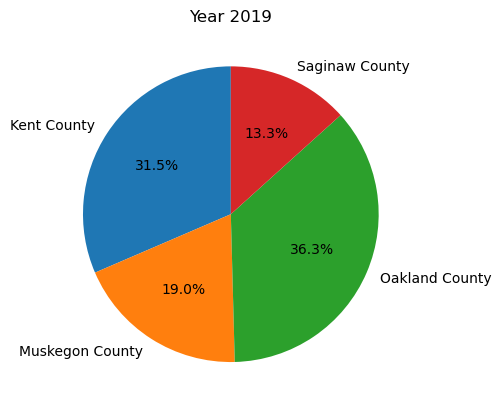

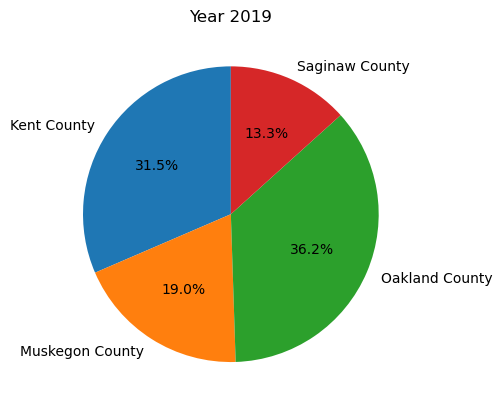

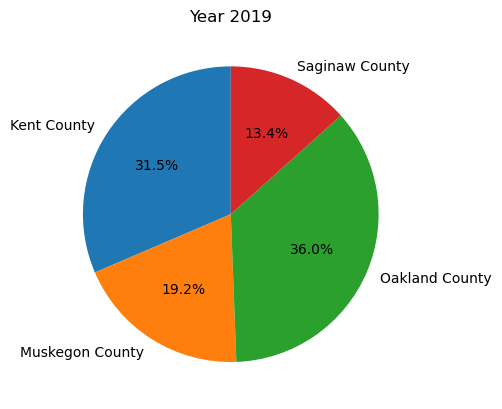

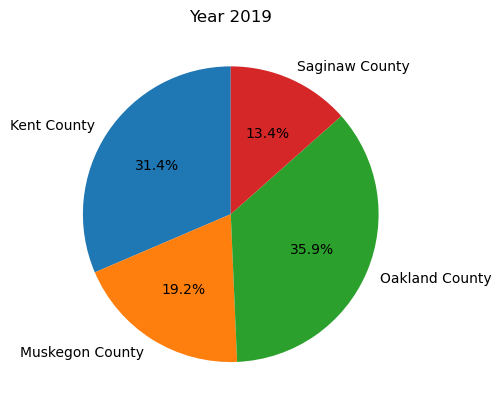

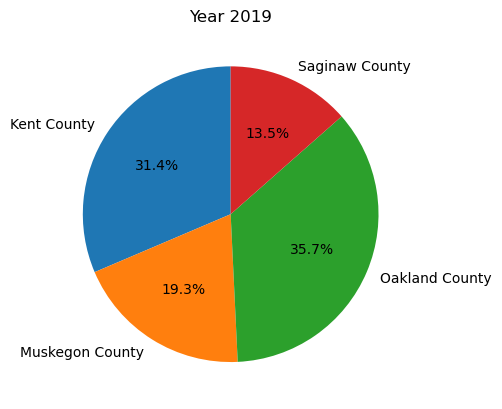

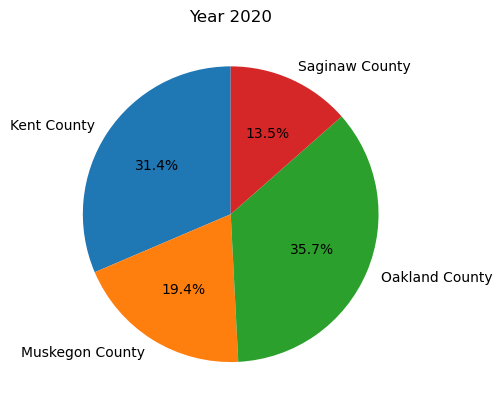

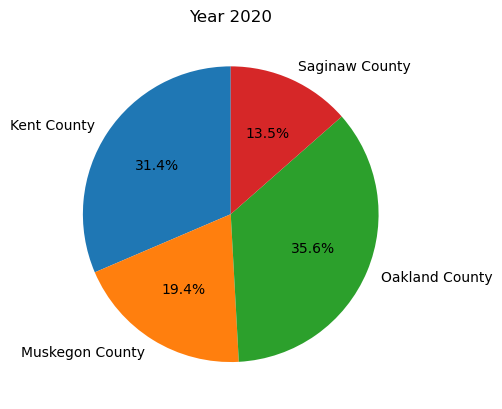

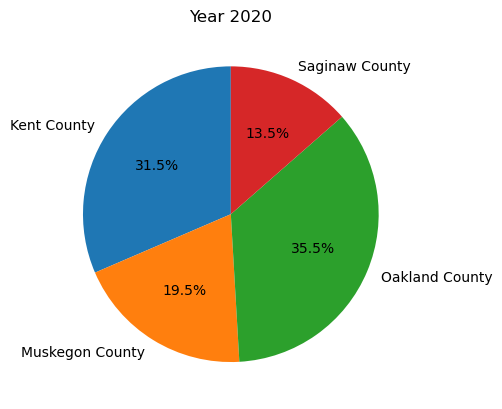

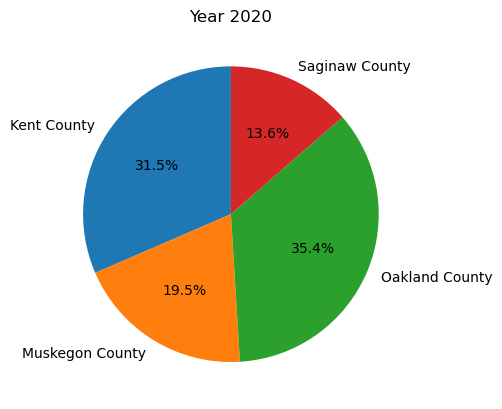

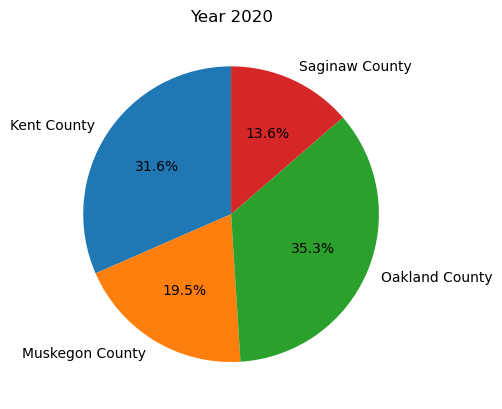

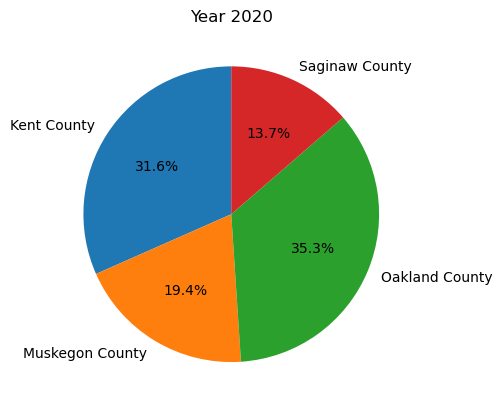

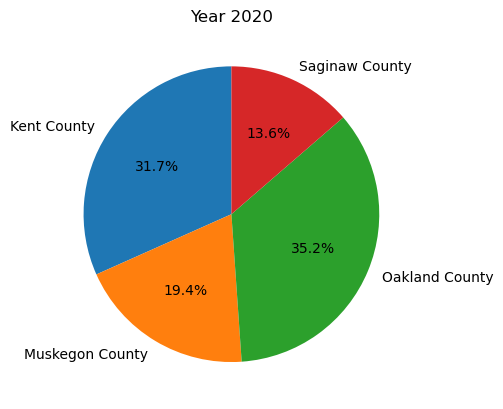

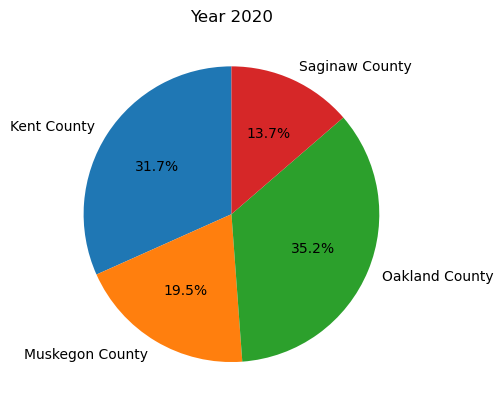

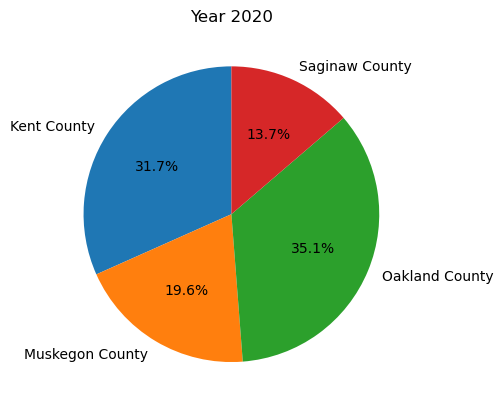

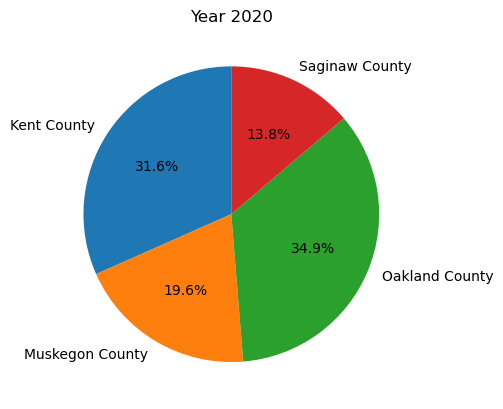

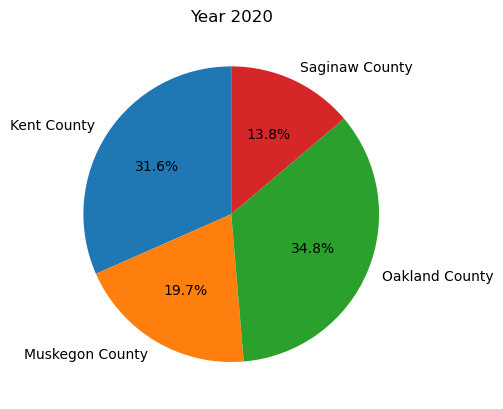

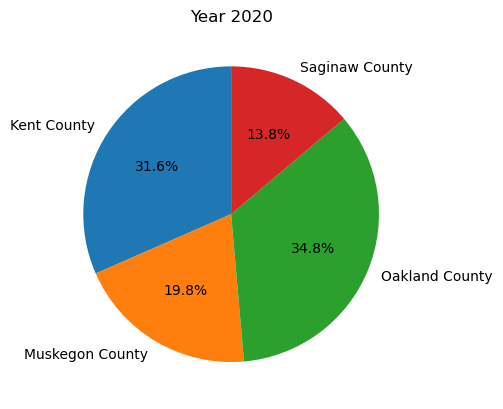

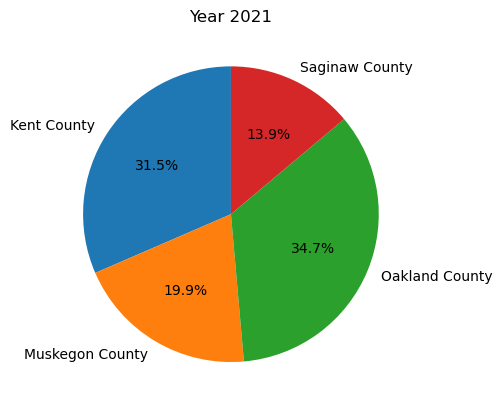

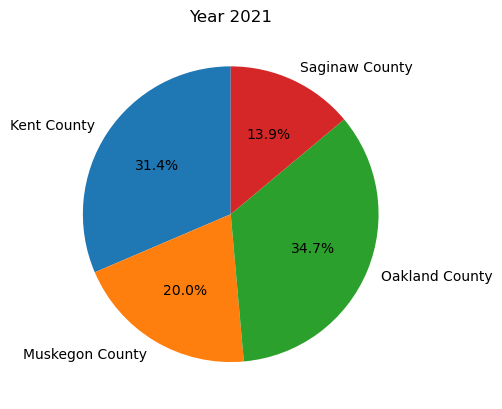

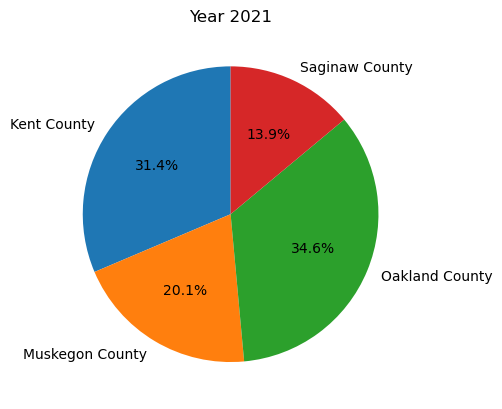

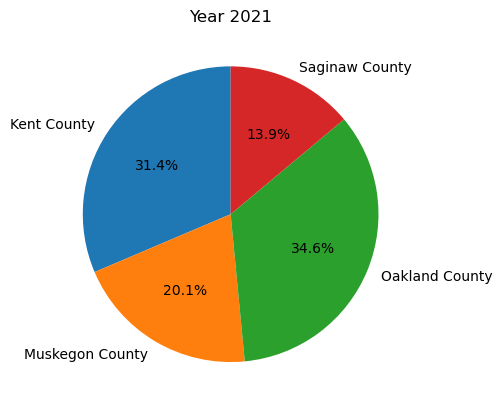

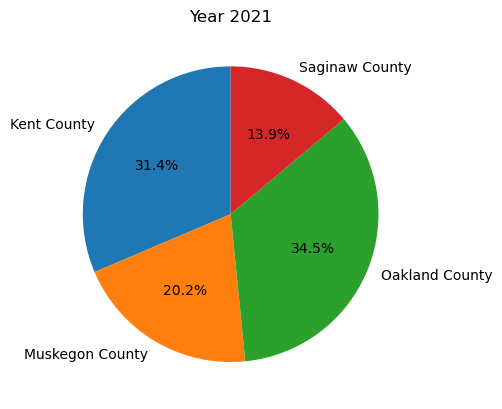

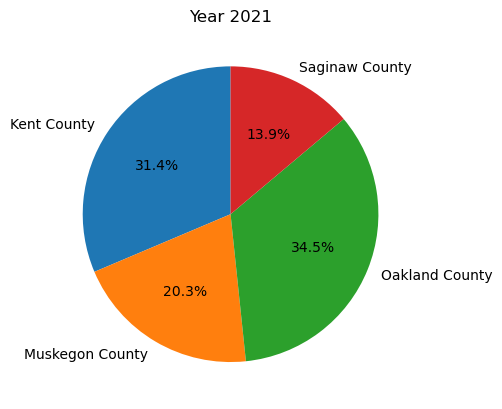

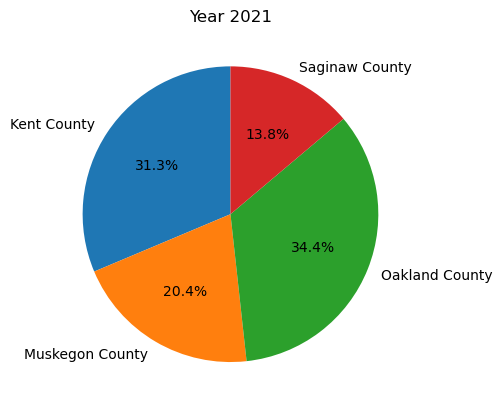

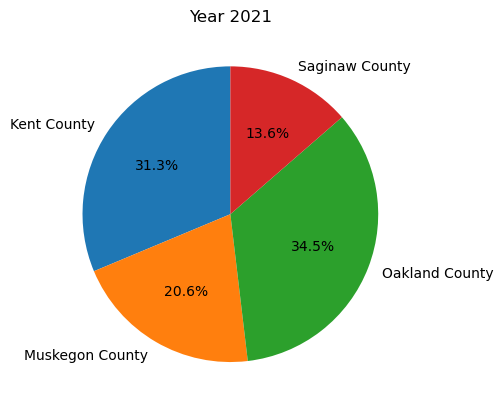

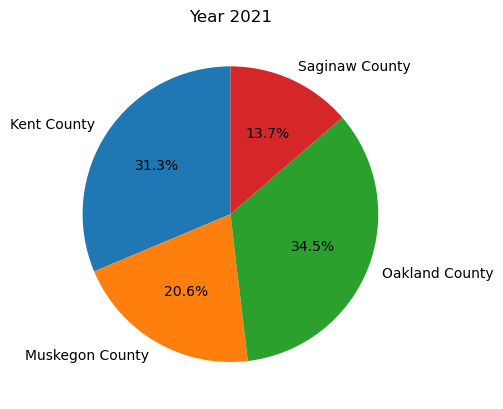

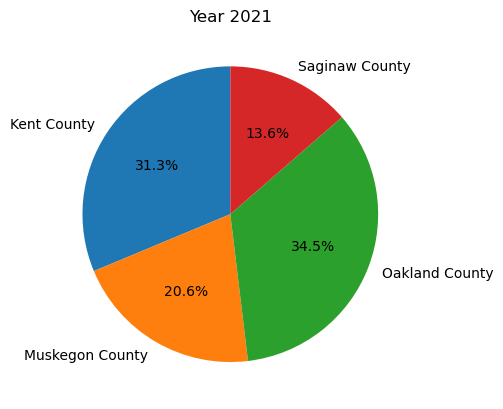

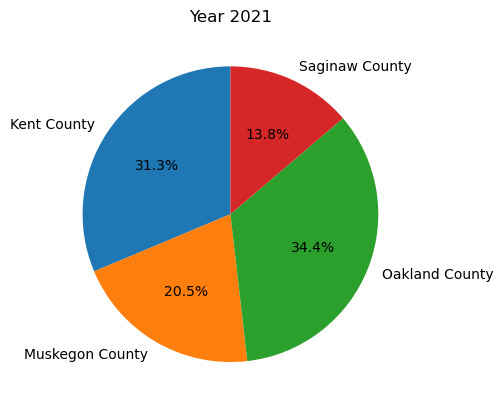

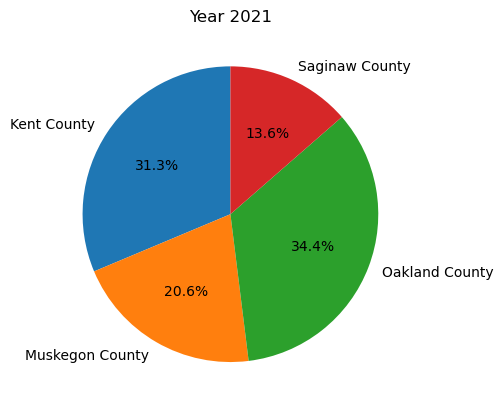

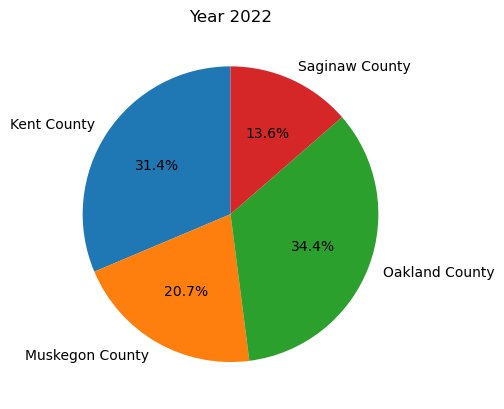

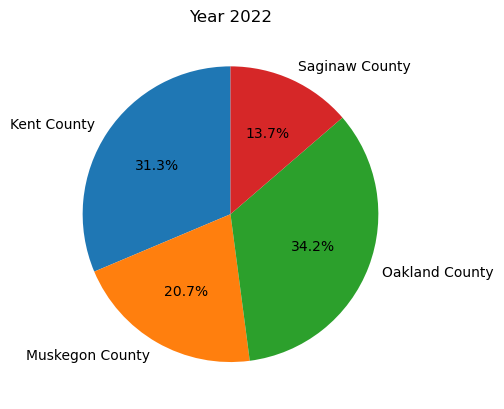

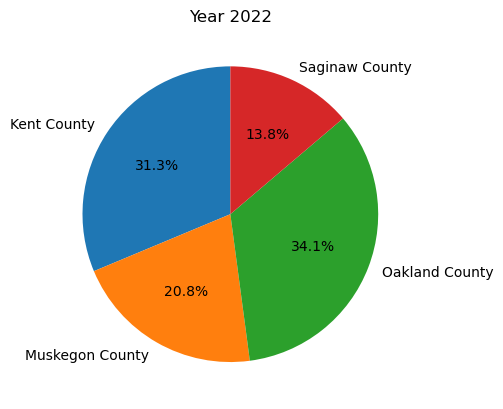

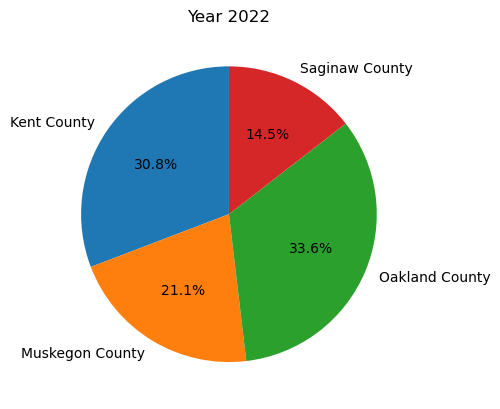

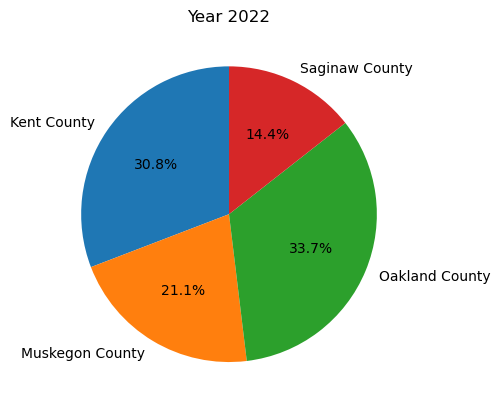

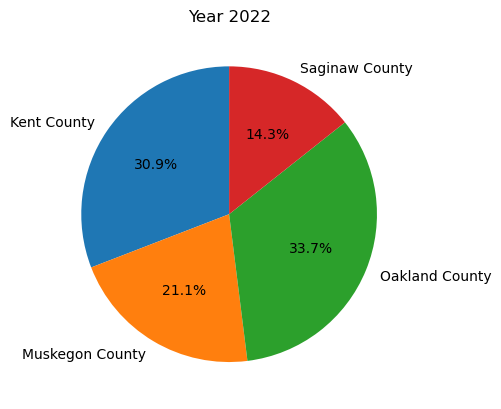

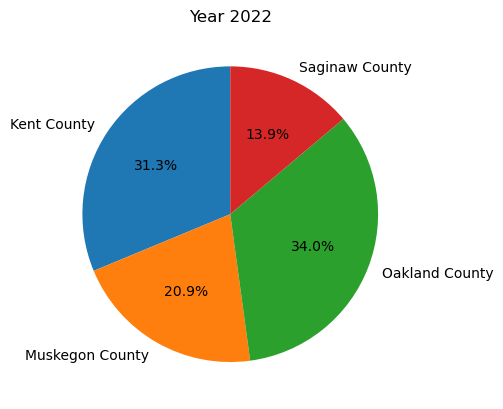

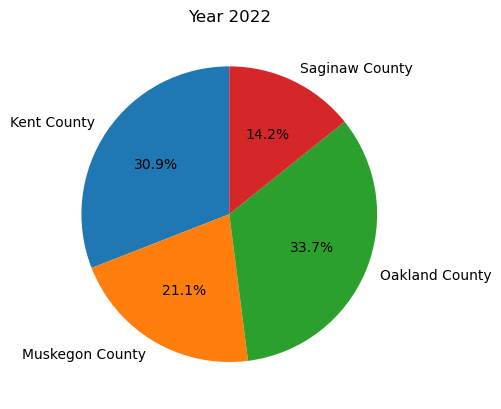

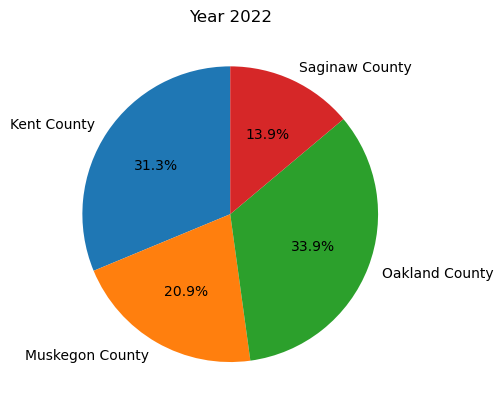

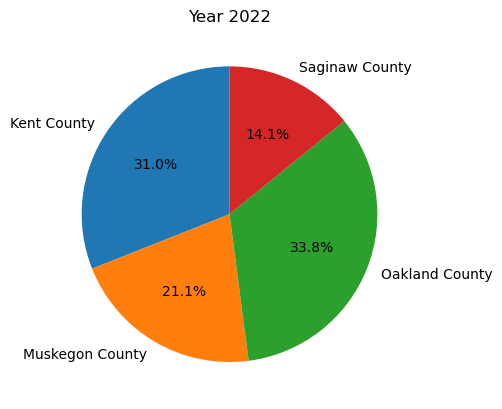

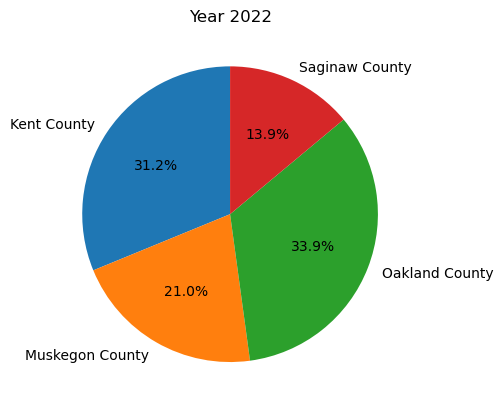

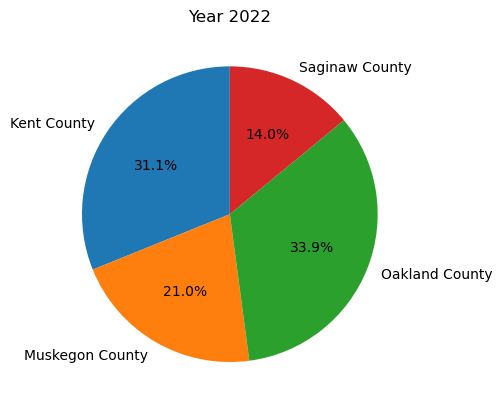

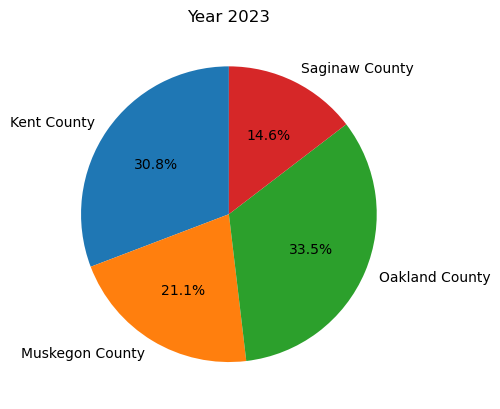

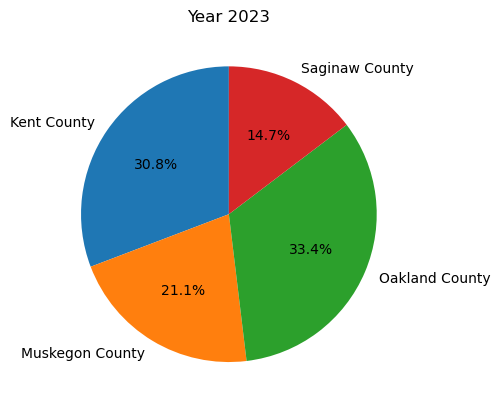

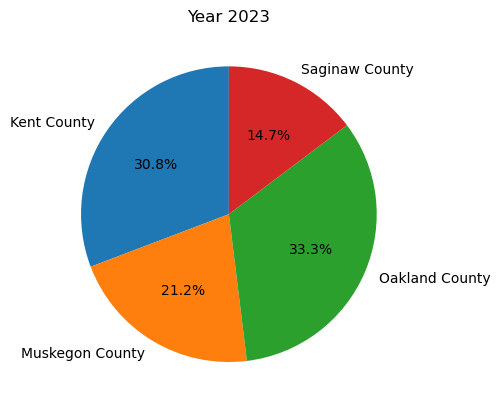

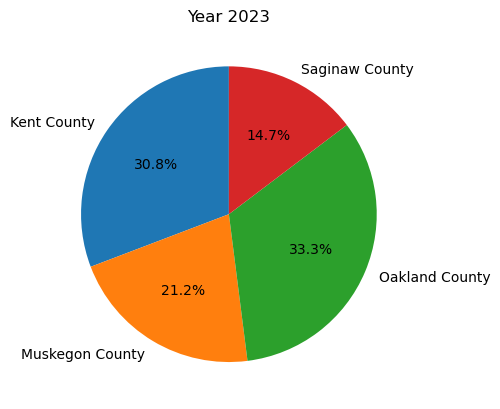

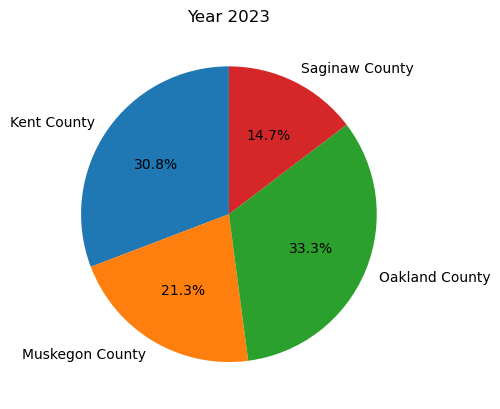

In [60]:
percentage_growth = pd.DataFrame(avgresult)
#percentage_growth.set_index('Year', inplace=True)

import matplotlib.pyplot as plt
unique_years = percentage_growth.index.unique()


for year, row in percentage_growth.iterrows():
    plt.figure()
    plt.pie(row.abs(), labels=row.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Year {year}')
    plt.show()